In [1]:
# ─────────────────────────────────────────────────────────────
# 📦 IMPORTACIÓN DE LIBRERÍAS - RECONFIGURACIONES INNOVA
# ─────────────────────────────────────────────────────────────

# 📊 Procesamiento y visualización de datos
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# 🗃️ Conexión a bases de datos
import pyodbc
from sqlalchemy import create_engine

# # 🤖 Inteligencia Artificial / OpenAI
# import openai
# from openai import OpenAI

# 🧰 Utilidades del sistema
import os
import re
import base64
import re
import unicodedata
from datetime import datetime
# from dotenv import load_dotenv

# 📓 Entorno Jupyter Notebook
import nbformat
from IPython.display import display, Markdown

# 🌐 Web scraping y análisis de HTML
from bs4 import BeautifulSoup

# 📝 Conversión y renderizado de Markdown
import markdown2



In [2]:
# # Ruta al archivo .env (ajusta si tu archivo está en otra carpeta)
# load_dotenv("pass.env")
# # Acceder a las variables
# openai.api_key = os.getenv("key")
# assistant_id = os.getenv("assistant").strip()
# # (Opcional) Verifica que se cargó correctamente (no muestres en producción)
# print("🔐 Clave cargada:", openai.api_key[:10] + "...")

# client = OpenAI(api_key=openai.api_key)
# thread = client.beta.threads.create()

In [3]:
# Función para guardar gráficos automáticamente
def guardar_grafico(fig, idx):
    output_dir = "maquetas/img"
    os.makedirs(output_dir, exist_ok=True)
    ruta = os.path.join(output_dir, f"grafico_{idx}.png")
    fig.savefig(ruta, dpi=150, bbox_inches='tight')
    print(f"✅ Guardado automático: {ruta}")

In [4]:
# Consulta SQL para extraer las columnas requeridas
sql_query = """
SELECT "Código", "Nombre Ejecutivo Técnico"
FROM innova_sgp_Carga.dbo.snapshot_proyectos
WHERE Gerencia='Innovación';
"""

# Establecer la cadena de conexión a la base de datos SQL Server
connection_string = (
    "Driver={ODBC Driver 18 for SQL Server};"
    "Uid=user_seg;Pwd=user_seg;"
    "Server=ddssql11-avs\\orion;Port=1972;"
    "Database=innova_sgp_Carga;Encrypt=No;TrustServerCertificate=No"
)

# Conectar a la base de datos
con = pyodbc.connect(connection_string, timeout=10)

# Ejecutar la consulta y guardar el resultado en un DataFrame
datos_proyecto = pd.read_sql_query(sql_query, con)

# Limpiar los datos en el DataFrame
datos_proyecto = datos_proyecto.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
datos_proyecto = datos_proyecto.applymap(lambda x: None if x == "" or x == "NA" else x)

# Renombrar las columnas para que sigan las convenciones de nombres en Python
datos_proyecto.columns = datos_proyecto.columns.str.replace(" ", "_").str.replace("ñ", "n")

con.close()

# Ver el resultado
print(datos_proyecto)

c:\Users\esteban.berrios\AppData\Local\miniconda3\envs\scraping\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


              Código Nombre_Ejecutivo_Técnico
0             SR-028                     None
1             SR-019                     None
2             SR-077                     None
3             SR-075                     None
4             SR-003                     None
...              ...                      ...
56606  23IATS-246659       YESSENNIA ESPINOZA
56607   23CVZ-246798       YESSENNIA ESPINOZA
56608   23CVZ-246799       YESSENNIA ESPINOZA
56609   23PPT-254187       YESSENNIA ESPINOZA
56610   23PPT-254190       YESSENNIA ESPINOZA

[56611 rows x 2 columns]


In [5]:
# Guarda en un dataframe el resultado de datos_proyecto
df = datos_proyecto.copy()

In [6]:
df = df[df["Nombre_Ejecutivo_Técnico"].isin([
    "JEREMY ANTONIO SALAS VENEGAS", 
    "JEANETTE ALEJANDRA MUNDACA DESPECCI", 
    "MARIA JOSE MORAGA CASTRO",
    "MARTA ESTHER  MINA AVENDANO", 
    "JUAN CARLOS CASTRO CABEZAS",
    "BARBARA SOL PARRAGUE GUZMAN", 
    "PAULA CAMILA DURÁN ABURTO",
    "JAIME TORRES MUÑOZ", 
    "Hugo Jara Vargas",
    "CRISTOFER ANTONIO MONSALVE SEPULVEDA", 
    "DIEGO IGNACIO VILLALOBOS RAMOS VILLALOBOS RAMOS",
    "JAVIERA DEL PILAR GOMEZ MURUA", 
    "JUAN MARTINEZ F.", 
    "PABLO GAETE HALLER",
    "CHRISTOPHER ANDRES VIVANCO BARRA", 
    "Lisette Espinoza", 
    "JUAN PABLO ALVAREZ CERECEDA",
    "SEBASTIAN  JILBERTO", 
    "YESSENNIA ESPINOZA", 
    "ALEJANDRO  LEMUS",
    "JAIME TORRES MUÑOZ", 
    "ANDRES SALVADOR LEAL VILCHES",
    "MARIA BELEN RAMIREZ BUNSTER",
    "JOSE JAVIER VERA SOLIS"
])]

In [7]:
# resetea el indice al dataframe df
df.reset_index(drop=True, inplace=True)
df

,Código,Nombre_Ejecutivo_Técnico
0,22CYE2-214046,ALEJANDRO LEMUS
1,22CYE-201817,ALEJANDRO LEMUS
2,22CYE2-214063,ALEJANDRO LEMUS
3,22CYE2-214068,ALEJANDRO LEMUS
4,22CYE2-213997,ALEJANDRO LEMUS
...,...,...
11840,23IATS-246659,YESSENNIA ESPINOZA
11841,23CVZ-246798,YESSENNIA ESPINOZA
11842,23CVZ-246799,YESSENNIA ESPINOZA
11843,23PPT-254187,YESSENNIA ESPINOZA


In [8]:
# Generar un dataframe a partir de esta ruta de acceso "C:\Users\esteban.berrios\OneDrive - corfo.cl\Documentos - SUBDIRECCIÓN DE MEJORA CONTINUA\General\Reconfiguraciones\BD Reconfiguraciones 2024.xlsx" y que solo se lea la hoja de trabajo "BD Reconfiguraciones 2024"
df_reconfiguraciones = pd.read_excel(
    r"C:\Users\esteban.berrios\OneDrive - corfo.cl\Documentos - SUBDIRECCIÓN DE MEJORA CONTINUA\Configuraciones y Reconfiguraciones\Reconfiguraciones\BD Reconfiguraciones 2024.xlsx",
    sheet_name="BBDD Reconfiguraciones"
)

c:\Users\esteban.berrios\AppData\Local\miniconda3\envs\scraping\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [9]:
# Eliminar las filas que tengan la columna vacia "Código Proyecto"
df_reconfiguraciones = df_reconfiguraciones[df_reconfiguraciones["Código Proyecto"].notna()]

In [10]:
#Obtener las siguientes columnas del dataframe df_reconfiguraciones
# "Código Proyecto", "Tipo Notificación", "N° Oficialización", "Fecha", "Año", "Instrumento", "Ejecutivo MC", "Situación (uso interno MC)", "Casuisticas errores en solicitudes"

df_reconfiguraciones = df_reconfiguraciones[
    [
        "Código Proyecto",
        "Tipo Notificación",
        "N° Oficialización",
        "Fecha",
        "Año",
        "Instrumento",
        "Ejecutivo MC",
        "Situación (uso interno MC)",
        "Casuisticas errores en solicitudes"
    ]
]

In [11]:
df_reconfiguraciones

,Código Proyecto,Tipo Notificación,N° Oficialización,Fecha,Año,Instrumento,Ejecutivo MC,Situación (uso interno MC),Casuisticas errores en solicitudes
0,21CVID2-184000,Reitemización,12096.0,2023-06-27,2023,Crea y Valida,MC,LISTA,Falta información adicional RRHH nuevos
1,21CVC2-183593,Reitemización y Reprogramación,15251.0,2023-08-21,2023,Crea y Valida,KARY,NO APLICA,NaN
2,22CVID-206781,Reitemización y Reprogramación,15376.0,2023-08-23,2023,Crea y Valida,CARO,FINALIZADA,NaN
3,21CVID-171995,Reitemización y Reprogramación,15798.0,2023-08-30,2023,Crea y Valida,CARO,FINALIZADA,NaN
4,22CVC-206581,Reitemización y Reprogramación,16870.0,2023-09-15,2023,Crea y Valida,ESTEBAN,FINALIZADA,Valores del presupuesto ya rendidos sin posibi...
...,...,...,...,...,...,...,...,...,...
860,23CYE3-252037,Reprogramación,21249.0,2025-11-25,2025,Consolida y Expande,ESTEBAN,PENDIENTE REVISIÓN FINANCIERA,NaN
861,24CVCS-256022,Reitemización,21340.0,2025-11-27,2025,Crea y Valida,ESTEBAN,PENDIENTE REVISIÓN FINANCIERA,NaN
862,24CVI-265098,Reitemización y Reprogramación,21339.0,2025-11-27,2025,Crea y Valida,KARY,NO GESTIONABLE,NaN
863,23CVI-245623,Reitemización,21389.0,2025-11-27,2025,Crea y Valida,ESTEBAN,PENDIENTE REVISIÓN FINANCIERA,NaN


In [12]:
df_reporte = pd.merge(df,df_reconfiguraciones,left_on='Código',right_on='Código Proyecto',how='left'
)

In [13]:
df_reporte.drop(columns=['Código Proyecto'], inplace=True)

In [14]:
df_reporte

,Código,Nombre_Ejecutivo_Técnico,Tipo Notificación,N° Oficialización,Fecha,Año,Instrumento,Ejecutivo MC,Situación (uso interno MC),Casuisticas errores en solicitudes
0,22CYE2-214046,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,22CYE-201817,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,22CYE2-214063,ALEJANDRO LEMUS,Reitemización y Reprogramación,1143.0,2024-01-24,2024.0,Consolida y Expande,MC,LISTA,NaN
3,22CYE2-214068,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,22CYE2-213997,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12257,23IATS-246659,YESSENNIA ESPINOZA,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
12258,23CVZ-246798,YESSENNIA ESPINOZA,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
12259,23CVZ-246799,YESSENNIA ESPINOZA,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
12260,23PPT-254187,YESSENNIA ESPINOZA,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [15]:
# Eliminar las filas que tengan la columna vacia "Código Proyecto"
df_reporte = df_reporte[df_reporte["N° Oficialización"].notna()]

In [16]:
"""
# Explicación:
Este bloque de código asigna proyectos específicos a la ejecutiva técnica "PAULA CAMILA DURÁN ABURTO" en el DataFrame df_reporte.

"""
# Lista de proyectos a asignar a PAULA CAMILA DURÁN ABURTO
proyectos_paula = [
    "24CVCS-255709", "24CVI-264683", "24IAT-267528", "24CVCS-256022",
    "24CVCS-255764", "24CVIS-255842", "24CVCS-255984", "24CVCS-255846",
    "24CVI-265016", "24CVIS-255935", "24CVIS-255786", "24CVCS-255807",
    "24CVC-264562", "24CVIS-255922", "24CVIS-255825", "24CVI-264982",
    "24CVCS-255996", "24CVI-264653", "24CVIS-255705", "24IAT-267198",
    "24CVIS-255868", "23IATS-248301", "24CVI-264684", "24CVIS-255890",
    "24CVCS-255784", "24CVCS-255945", "24IAT-272787", "24CVI-264878",
    "24IAT-272736", "24CVIS-255832", "24CVCS-255736", "24CVIS-255755",
    "24CVC-265029", "24CVCS-256030", "23CYE-241031", "23CVI2-251478",
    "24CVCS-255822", "24CVI-264699", "24CVIS-255823"
]

# Asignar el nombre a esos proyectos en df_reporte
df_reporte.loc[df_reporte["Código"].isin(proyectos_paula), "Nombre_Ejecutivo_Técnico"] = "PAULA CAMILA DURÁN ABURTO"

In [17]:
# Se carga base  de los ejecutivos espejo que reeemplazan a Paula Durán
df_ejecutivo = pd.read_excel(
    r"C:\Users\esteban.berrios\OneDrive - corfo.cl\Documentos - SUBDIRECCIÓN DE MEJORA CONTINUA\Configuraciones y Reconfiguraciones\Reportería reconfiguraciones\Proyectos a distribuir cartera PD 2.xlsx",
    sheet_name="Hoja1",
    usecols=["Código", "Nombre Ejecutivo Espejo", "Asignación Ejecutivo"]
)

In [18]:
"""
# Explicación:
1. Se define el rango de fechas entre el 10 de junio de 2025 y el 11 de agosto de 2025.
2. Se asegura que la columna "Fecha" en el DataFrame df_reporte esté en formato datetime, manejando errores y considerando el formato día/mes/año.
3. Se crea un diccionario que mapea los códigos de proyecto a los nombres de los ejecutivos espejo.
4. Se aplica una condición para filtrar los proyectos que están en la lista de proyectos de Paula y que tienen una fecha dentro del rango especificado.
5. Finalmente, se actualiza la columna "Nombre_Ejecutivo_Técnico" en df_reporte con los nombres de los ejecutivos espejo correspondientes.
"""

# Definir el rango de fechas
fecha_inicio = pd.to_datetime("2025-06-10")
fecha_fin = pd.to_datetime("2025-08-11")

# Asegurar formato datetime en df_reporte
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce", dayfirst=True)

# Crear un diccionario {Código: Nombre Ejecutivo Espejo}
mapa_espejo = df_ejecutivo.set_index("Código")["Nombre Ejecutivo Espejo"].to_dict()

# Aplicar el reemplazo solo en los proyectos de Paula y dentro del rango de fechas
condicion = (
    df_reporte["Código"].isin(proyectos_paula) &
    (df_reporte["Fecha"].between(fecha_inicio, fecha_fin))
)

df_reporte.loc[condicion, "Nombre_Ejecutivo_Técnico"] = df_reporte.loc[condicion, "Código"].map(mapa_espejo)

C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_35604\34500419.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce", dayfirst=True)


In [19]:
"""
# Explicación:
Este bloque de código asigna los ejecutivos finales a los proyectos específicos de Paula Durán que tienen una fecha posterior al 12 de agosto de 2025,
 utilizando un mapeo basado en un DataFrame adicional que contiene las asignaciones de ejecutivos.
"""

# Definir la fecha de corte
fecha_corte = pd.to_datetime("2025-08-12")

# Crear un diccionario {Código: Asignación Ejecutivo}
mapa_final = df_ejecutivo.set_index("Código")["Asignación Ejecutivo"].to_dict()

# Condición: proyectos de Paula + fecha posterior al 12-08-2025
condicion_final = (
    df_reporte["Código"].isin(proyectos_paula) &
    (df_reporte["Fecha"] > fecha_corte)
)

# Aplicar el reemplazo con el ejecutivo final
df_reporte.loc[condicion_final, "Nombre_Ejecutivo_Técnico"] = df_reporte.loc[condicion_final, "Código"].map(mapa_final)

In [20]:
# # Descargar df_reporte a un archivo excel en Descargas con el nombre "Reporte Reconfiguraciones2.xlsx"
# df_reporte.to_excel(
#     os.path.join(os.path.expanduser("~"), "Downloads", "Reporte Reconfiguraciones2.xlsx"),
#     index=False
# )   

In [21]:


def normalizar_nombre(nombre):
    if isinstance(nombre, str):
        # Eliminar espacios invisibles y normalizar unicode
        nombre = unicodedata.normalize("NFKC", nombre)
        # Quitar espacios extras
        nombre = " ".join(nombre.split())
        # Convertir a formato título (respetando tildes)
        nombre = nombre.lower().title()
        return nombre
    return nombre

# Aplicar normalización base
df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].apply(normalizar_nombre)

# Reemplazos manuales conocidos
reemplazos = {
    "Diego Ignacio Villalobos Ramos Villalobos Ramos": "Diego Villalobos Ramos",
    "Sebastian  Jilberto": "No Tiene Ejecutivo Asignado",
    "Sebastian Jilberto": "No Tiene Ejecutivo Asignado",
    "Yessenia Espinoza": "No Tiene Ejecutivo Asignado",
    "Felipe Francisco Aandueza Del Campo": "No Tiene Ejecutivo Asignado"
}

# Aplicar los reemplazos
df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].replace(reemplazos)

# También podemos normalizar la situación
df_reporte["Situación (uso interno MC)"] = df_reporte["Situación (uso interno MC)"].replace("LISTA", "FINALIZADA")


C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_35604\683950950.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].apply(normalizar_nombre)
C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_35604\683950950.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].replace(reemplazos)
C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_35604\6

In [22]:
# # En la columna "Nombre_Ejecutivo_Técnico" formatear con la primera letra en mayúscula y el resto en minúscula
# df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.title()
# # Si encuentra la palabra "Diego Villalobos Ramos Villalobos Ramos" en la columna "Nombre_Ejecutivo_Técnico" reemplazar por "Diego Villalobos Ramos"
# df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Diego Ignacio Villalobos Ramos Villalobos Ramos", "Diego Villalobos Ramos", regex=False)
# df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Sebastian Jilberto", "No tiene ejecutivo asignado", regex=False)
# df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Yessenia Espinoza", "No tiene ejecutivo asignado", regex=False)
# df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Felipe Francisco Aandueza Del Campo", "No tiene ejecutivo asignado", regex=False)

# # Si encuentra la palabra "LISTA" en la columna "NomSituación (uso interno MC)" reemplazar por "FINALIZADA"
# df_reporte["Situación (uso interno MC)"] = df_reporte["Situación (uso interno MC)"].str.replace("LISTA", "FINALIZADA", regex=False)


In [23]:
# import time

# # Guardar el DataFrame como CSV temporal
# ruta_csv = "df_reporte.csv"
# df_reporte.to_csv(ruta_csv, index=False)

# # Subir el archivo al Assistant
# uploaded_file = client.files.create(
#     file=open(ruta_csv, "rb"),
#     purpose="assistants"
# )

# # Esperar un momento para asegurar que el archivo esté listo
# time.sleep(2)

# # Enviar el archivo y un mensaje solicitando análisis general
# mensaje_df = client.beta.threads.messages.create(
#     thread_id=thread.id,
#     role="user",
#     content=(
#         "Hola, te adjunto el archivo 'df_reporte.csv', que contiene información de reconfiguraciones "
#         "de proyectos. Por favor analiza su estructura, columnas principales, y entrega un resumen general "
#         "de los datos antes de que te haga consultas específicas."
#     ),
#     attachments=[
#         {
#             "file_id": uploaded_file.id,
#             "tools": [{"type": "code_interpreter"}]
#         }
#     ]
# )

# # Ejecutar el análisis del Assistant
# run = client.beta.threads.runs.create(
#     thread_id=thread.id,
#     assistant_id=assistant_id,
# )

# # Esperar a que el análisis esté completo
# print("⏳ Esperando que el Assistant complete la ejecución...")
# while True:
#     estado = client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id)
    
#     if estado.status == "completed":
#         print("✅ Análisis completado.")
#         break
#     elif estado.status == "failed":
#         print("❌ Falló la ejecución del Assistant.")
#         if estado.last_error:
#             print("💥 Detalle del error:", estado.last_error)
#         break
#     time.sleep(2)

# # Mostrar la respuesta del Assistant (si existe)
# mensajes = client.beta.threads.messages.list(thread_id=thread.id)
# for m in mensajes.data:
#     if m.role == "assistant":
#         print("📊 Resumen del Assistant:")
#         print(m.content[0].text.value)

In [24]:
# Descargar df_reporte en archivo csv
df_reporte.to_csv(r"C:\Users\esteban.berrios\OneDrive - corfo.cl\Documentos - SUBDIRECCIÓN DE MEJORA CONTINUA\Configuraciones y Reconfiguraciones\Reportería reconfiguraciones\df_reporte.csv", index=False)

## 🎯 Objetivo del Reporte

Este folleto visual tiene por finalidad entregar una visión **estructurada, analítica y accionable** sobre los **procesos de reconfiguración de proyectos INNOVA** registrados durante el período **enero 2024 – noviembre 2025**.  

El documento integra **10 gráficos analíticos** y **3 tablas de calidad documental**, todos diseñados para facilitar la lectura ejecutiva y apoyar la toma de decisiones mediante una combinación de **visualizaciones claras**, **tendencias temporales**, y **hallazgos clave** basados en datos reales del sistema institucional.

El objetivo central es analizar estos elementos de forma **cruzada y complementaria**, orientando insights estratégicos en torno a los siguientes ejes:

📈 **Evolución temporal de solicitudes**  
Identifica cambios mensuales, estacionalidades y ciclos operativos desde 2024 a 2025, permitiendo visualizar meses críticos, acumulación de trámites y patrones asociados a cierres administrativos o hitos institucionales.

🧩 **Distribución por instrumento y ejecutivo técnico**  
Los gráficos muestran cómo se distribuyen las reconfiguraciones entre instrumentos (CH, GI, IR, PDT, PATI) y ejecutivos, explicando tendencias de carga operativa, concentración de casos y posibles cuellos de gestión.

📅 **Meses de mayor actividad y tendencia durante el 2025**  
Se detallan los períodos peak (junio, octubre y noviembre 2024; junio y octubre 2025), junto con análisis de comportamiento estacional y la transición entre cierres semestrales.

📊 **Estados internos del proceso de reconfiguración (Mejora Continua)**  
El gráfico de estados (`PROCESAR`, `PROCESADA`, `NO APLICA`, `NO GESTIONABLE`, `PENDIENTE REVISIÓN FINANCIERA`, `FINALIZADA`) evidencia el desempeño del flujo administrativo y el backlog operativo activo.

❗ **Frecuencia y tipo de modificaciones**  
El gráfico de **tipos de notificación 2025** expone la participación relativa de `Reitemización`, `Reprogramación`, `Rectifica`, `Suspensión`, `Modificación de Proyecto`, entre otras, permitiendo identificar focos de trabajo y complejidad técnica.

🧾 **Calidad técnico-administrativa de las cartas**  
Las **tres tablas de resumen** cuantifican el nivel de exactitud documental en dos dimensiones:
- Historico total del período analizado  
- Año 2025 exclusivamente  
- Tipologías específicas de observaciones y causas más frecuentes

Estos indicadores permiten evaluar consistencia del proceso, madurez operativa y oportunidades de mejora estructural.

⚠️ **Tipos de observaciones y origen del error documental**  
La Tabla 3 clasifica las observaciones por causa (cálculo presupuestario, RRHH, fechas de informes, montos a reitemizar, rendiciones sin posibilidad de ajuste, entre otros), entregando una hoja de ruta para fortalecer validaciones técnicas y administrativas.

---

## ✅ ¿Qué Puedes Consultar?

- 📈 **Cómo ha evolucionado el volumen de reconfiguraciones** desde enero 2024 a noviembre 2025, identificando ciclos, peaks y meses críticos.  
- 🏷️ **Qué instrumentos y qué ejecutivos concentran la mayor carga operativa**, y cómo esa carga se redistribuye a lo largo del tiempo.  
- 📅 **Cuáles fueron los meses más activos** en términos de solicitudes, tanto en 2024 como en 2025.  
- 🧮 **Cómo se distribuyen los estados internos** del proceso (*Mejora Continua*), revelando qué proporción está finalizada, rechazada, pendiente o en proceso.  
- 📊 **Qué tipos de notificación predominan en 2025** y cuál es su participación porcentual dentro del total.  
- 🧾 **Cuál es el nivel de calidad documental alcanzado**, incluyendo:
  - % de cartas sin observaciones (histórico total)  
  - % de cartas sin observaciones en 2025  
  - Tipologías más comunes de error documental  
- ⚠️ **Qué tipos de observaciones se repiten con mayor frecuencia**, y qué focos deberían abordarse en estrategias de mejora continua.

📎 **Fuente de datos:** Registro consolidado de notificaciones de reconfiguración INNOVA CHILE  
📅 **Cobertura temporal:** Enero 2024 – Noviembre 2025  
📌 **Segmentos clave incluidos en el análisis:**  
Instrumento, Ejecutivo Técnico, Tipo de Notificación, Situación Interna (MC), Calidad Documental y Tipologías de Observación

### 1-. **Análisis mensual de reconfiguraciones de proyectos INNOVA (Ene 2024 – Nov 2025)**  

#### 📁 **Descripción del análisis**  

El gráfico presenta la evolución mensual del número total de **solicitudes de reconfiguración de proyectos INNOVA** registradas entre enero de 2024 y noviembre de 2025, a partir de las notificaciones consolidadas en `df_reporte.csv`.  
El conteo considera todas las notificaciones formales vinculadas a procesos de **reprogramación, reitemización, suspensión y otras modificaciones** ingresadas al sistema de seguimiento de proyectos.

#### 📅 **Meses con Mayor Actividad**  

Los tres meses con mayor número de notificaciones en el período analizado son:

* **Noviembre 2025**: 56 notificaciones  
* **Noviembre 2024**: 55 notificaciones  
* **Octubre 2025**: 54 notificaciones  

📌 *El comportamiento mantiene una concentración marcada en los cierres de semestre y de año, donde se intensifican los procesos administrativos de revisión técnica y financiera.*

#### 📉 **Tendencia Temporal**  

El análisis evidencia una **tendencia cíclica y semestral**, en la que las reconfiguraciones aumentan de manera significativa durante los meses asociados a hitos de gestión interna:

- **Enero–Junio 2024:** crecimiento sostenido, con leve caída en marzo (12 notificaciones) y repunte en mayo–junio.  
- **Julio–Diciembre 2024:** incremento progresivo hasta el peak del año en noviembre (55 notificaciones), asociado a los cierres técnicos y financieros.  
- **Enero–Marzo 2025:** reducción temporal tras el receso institucional, estabilizándose en torno a 29–36 notificaciones mensuales.  
- **Abril–Junio 2025:** nuevo incremento significativo (52 notificaciones en junio) coincidente con el cierre del primer semestre.  
- **Julio–Octubre 2025:** leve desaceleración y posterior repunte en octubre (54 notificaciones), reflejando nuevamente la preparación de cierres administrativos.  
- **Noviembre 2025:** máximo del período analizado con 56 notificaciones, consolidando la tendencia estacional de alta demanda.

> **Observación clave:**  
> 💡 Las reconfiguraciones mantienen un patrón **recurrente de alta estacionalidad**, vinculado a los periodos de control y seguimiento institucional. Este comportamiento sugiere una **alineación directa entre los ciclos de revisión técnica y las ventanas formales de modificación de proyectos.**

C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_35604\2597970855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_35604\2597970855.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=rosados, ax=ax)


✅ Guardado automático: maquetas/img\grafico_1.png


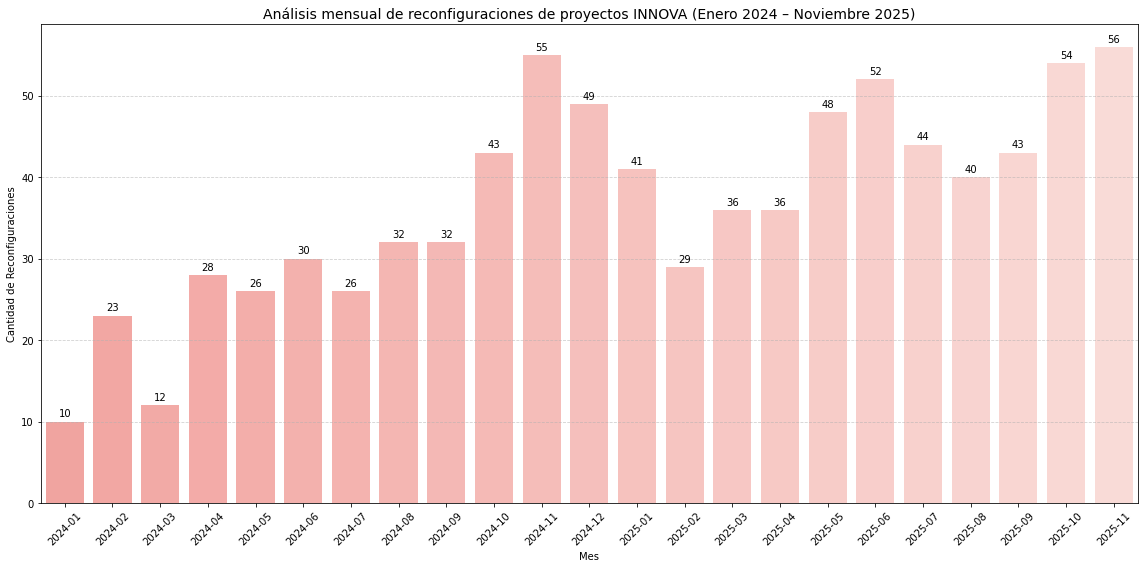

In [ ]:
# --- Preparar datos
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
df_reporte = df_reporte[df_reporte["Fecha"] >= "2024-01-01"]
df_reporte = df_reporte[df_reporte["Fecha"].dt.to_period("M").astype(str) != "2026-01"]
df_reporte['Mes'] = df_reporte['Fecha'].dt.to_period('M').astype(str)

reconfiguraciones_por_mes = df_reporte['Mes'].value_counts().sort_index()
df_plot = reconfiguraciones_por_mes.reset_index()
df_plot.columns = ['Mes', 'Cantidad']

# --- Generar gradiente de rosado CORFO
base_color = mcolors.to_rgb("#FD9893")
rosados = [mcolors.to_hex(tuple(min(1, c + i * 0.01110) for c in base_color)) for i in range(len(df_plot))]

# --- Graficar
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=rosados, ax=ax)

# Etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Títulos y estilo
plt.title("Análisis mensual de reconfiguraciones de proyectos INNOVA (Enero 2024 – Noviembre 2025)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Cantidad de Reconfiguraciones")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# ✅ Guardar gráfico
guardar_grafico(fig, 1)
plt.show()

### 2-. **Reconfiguraciones por mes y por instrumento**

#### 🎯 **Descripción del análisis**

El gráfico de barras apiladas muestra la evolución mensual de las **solicitudes de reconfiguración de proyectos INNOVA**, clasificadas por **instrumento de financiamiento** entre enero de 2024 y noviembre de 2025.  
Los datos provienen del archivo `df_reporte.csv` y agrupan notificaciones formales asociadas a **reprogramaciones, reitemizaciones, suspensiones** y otras modificaciones administrativas.  

Para asegurar una lectura más clara, los instrumentos con participación **inferior al 3 % del total** fueron consolidados en la categoría **“Otros”**, permitiendo focalizar el análisis en los instrumentos con mayor relevancia operativa.

#### 🔍 **Hallazgos principales**

#### 🥇 **Instrumentos más activos por volumen**

- **Crea y Valida**:  **≈ 66 % de las reconfiguraciones totales**  
  📌 Continúa siendo el instrumento con **mayor carga administrativa**, concentrando sistemáticamente la mayor cantidad de solicitudes.  
  Sus peaks históricos se observan en:  
  - **Noviembre 2024**  
  - **Junio 2025**  
  - **Octubre 2025**  
  Todos ellos asociados a ciclos de cierre técnico y revisión financiera institucional.

#### 📉 **Instrumentos con menor participación o estabilidad**

- **Capital Humano**:  
  - Peak de **≈ 14–15 solicitudes en diciembre 2024**.  
  - Durante 2025 mantiene entre **5 y 10 reconfiguraciones mensuales**, con leve desaceleración después de mitad de año.  

- **Consolida y Expande**:  
  - Participación estable, moviéndose entre **4 y 9 notificaciones mensuales**.  
  - Peak en **junio 2025**, alineado con aumentos globales de carga operativa.  

- **Innova Alta Tecnología**:  
  - Patrón **intermitente**, con repuntes relevantes en **noviembre 2024, junio 2025 y octubre 2025**.  
  - Alcanza hasta **6 solicitudes** en meses de mayor actividad.  

#### 📌 **Categoría “Otros”**

- Agrupa instrumentos cuya participación es **menor al 3 %** en el período analizado.  
- No supera las **3 reconfiguraciones mensuales**, manteniendo un impacto operativo marginal. Acá se asocian principalmente a instrumentos tales como:  
  - **Programa de Absorción Tecnológica para la Innovación**  
  - **Gestión de la Innovación**  

> **Observación clave:**  
> 💡 El instrumento **Crea y Valida** concentra cerca de **dos tercios del total de reconfiguraciones**, lo que confirma su papel estructural dentro del ecosistema de gestión de modificaciones.  
> Este patrón revela la necesidad de **planificación operativa diferenciada**, especialmente en meses de alta carga: **noviembre 2024**, **junio 2025** y **octubre 2025**.  

✅ Guardado automático: maquetas/img\grafico_2.png


<Figure size 1152x576 with 0 Axes>

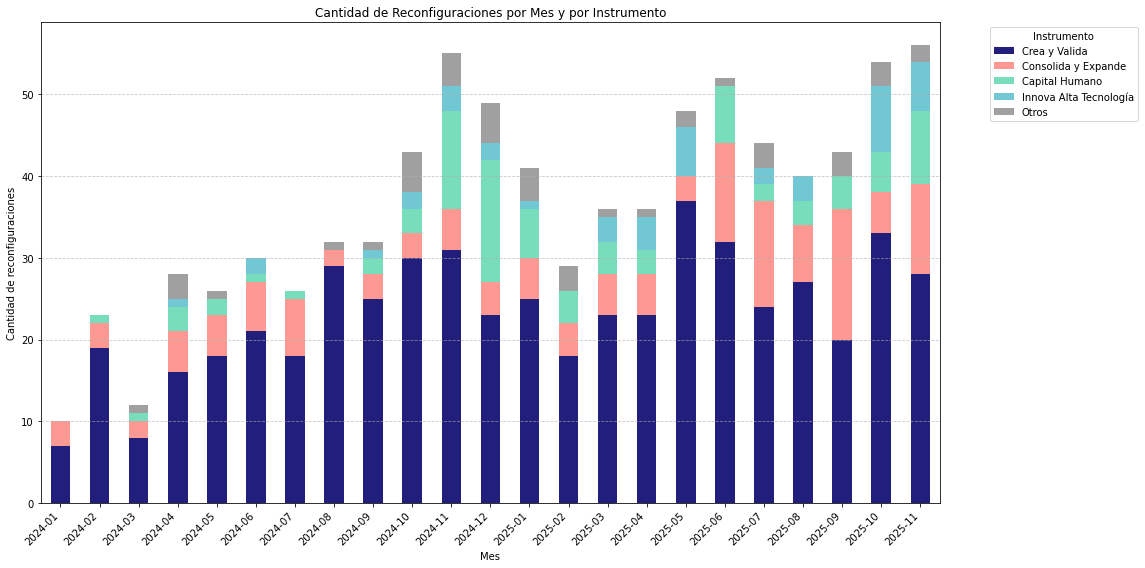

In [ ]:
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
df_reporte = df_reporte[df_reporte["Fecha"] >= "2024-01-01"]
df_reporte["Mes"] = df_reporte["Fecha"].dt.to_period("M").astype(str)
# Excluir abril 2025
df_reporte = df_reporte[df_reporte['Mes'] != '2026-01']

# Calcular % total por instrumento para agrupar los que son menores a 3%
porcentaje_instrumento = df_reporte["Instrumento"].value_counts(normalize=True)
instrumentos_principales = porcentaje_instrumento[porcentaje_instrumento >= 0.03].index.tolist()

# Reemplazar los instrumentos menores a 3% por "Otros"
df_reporte["Instrumento Agrupado"] = df_reporte["Instrumento"].apply(
    lambda x: x if x in instrumentos_principales else "Otros"
)

# Mapeo específico para mantener colores consistentes
color_mapeo = {
    "Crea y Valida": "#221E7C",
    "Consolida y Expande": "#FD9893",
    "Capital Humano": "#78DDBB",
    "Gestión de la Innovación": "#3F3F3F",
    "Innova Alta Tecnología": "#72C7D5",
    "Otros": "#A0A0A0"# Más contrastante que el celeste  # si aparece este también
}

# Crear tabla cruzada
tabla_instrumentos = pd.crosstab(df_reporte["Mes"], df_reporte["Instrumento Agrupado"])

# Ordenar columnas por frecuencia
orden_columnas = tabla_instrumentos.sum().sort_values(ascending=False).index.tolist()
tabla_instrumentos = tabla_instrumentos[orden_columnas]

# Aplicar colores en el mismo orden
colores_usados = [color_mapeo.get(col, "#CCCCCC") for col in tabla_instrumentos.columns]

# Graficar
plt.figure(figsize=(16, 8), facecolor='white')
tabla_instrumentos.plot(
    kind="bar",
    stacked=True,
    color=colores_usados,
    figsize=(16, 8)
)

plt.title("Cantidad de Reconfiguraciones por Mes y por Instrumento", color='black')
plt.xlabel("Mes", color='black')
plt.ylabel("Cantidad de reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title="Instrumento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Guardar
fig = plt.gcf()
guardar_grafico(fig, 2)
plt.show()

### 3-. **Reconfiguraciones por mes en 2025 (Ene – Nov 2025)**

#### 🎯 **Descripción del análisis**  
El gráfico de columnas simples presenta la evolución mensual de las **reconfiguraciones notificadas durante 2025**, considerando el período de enero a noviembre.  
Los datos provienen del archivo `df_reporte.csv` y consolidan las notificaciones formales de **reprogramaciones, reitemizaciones, suspensiones** y otros ajustes técnicos realizados por los equipos ejecutivos.

#### 📅 **Evolución de solicitudes en 2025**  

- **Noviembre 2025**: 56 reconfiguraciones  
- **Octubre 2025**: 54 reconfiguraciones  
- **Junio 2025**: 52 reconfiguraciones  
- **Mayo 2025**: 48 reconfiguraciones  
- **Julio 2025**: 44 reconfiguraciones  
- **Septiembre 2025**: 43 reconfiguraciones  
- **Enero 2025**: 41 reconfiguraciones  
- **Agosto 2025**: 40 reconfiguraciones  
- **Abril 2025**: 36 reconfiguraciones  
- **Marzo 2025**: 36 reconfiguraciones  
- **Febrero 2025**: 29 reconfiguraciones  

📌 *Los peaks más destacados se observan en **noviembre (56)**, **octubre (54)** y **junio (52)**, todos ellos asociados a cierres de ciclo técnico, revisión de informes y consolidación administrativa institucional.  
El mínimo anual se presenta en **febrero (29)**.*

#### 📉 **Comportamiento general**  
Durante 2025 se observa una tendencia **ascendente desde marzo hasta junio**, consolidando una fase de alta actividad en mitad de año.  
Posteriormente, el comportamiento se estabiliza en torno a las **40 reconfiguraciones mensuales**, con incrementos en septiembre–noviembre que anticipan las cargas típicas de cierre anual.

El patrón reafirma el carácter **cíclico y semestral** de las modificaciones, donde los meses de mayor actividad coinciden con procesos de **evaluación técnica, cierres administrativos y planificación del segundo semestre**.

> **Observación clave:**  
> 💡 El análisis anual confirma que las reconfiguraciones mantienen un **ritmo operativo maduro y predecible**, con picos de gestión concentrados en **junio, octubre y noviembre**, reflejando la necesidad de planificar recursos técnicos adicionales durante dichos periodos críticos.

C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_35604\2990480320.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=colores_meses_2025)
C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_35604\2990480320.py:23: UserWarning: 
The palette list has fewer values (3) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=colores_meses_2025)


✅ Guardado automático: maquetas/img\grafico_3.png


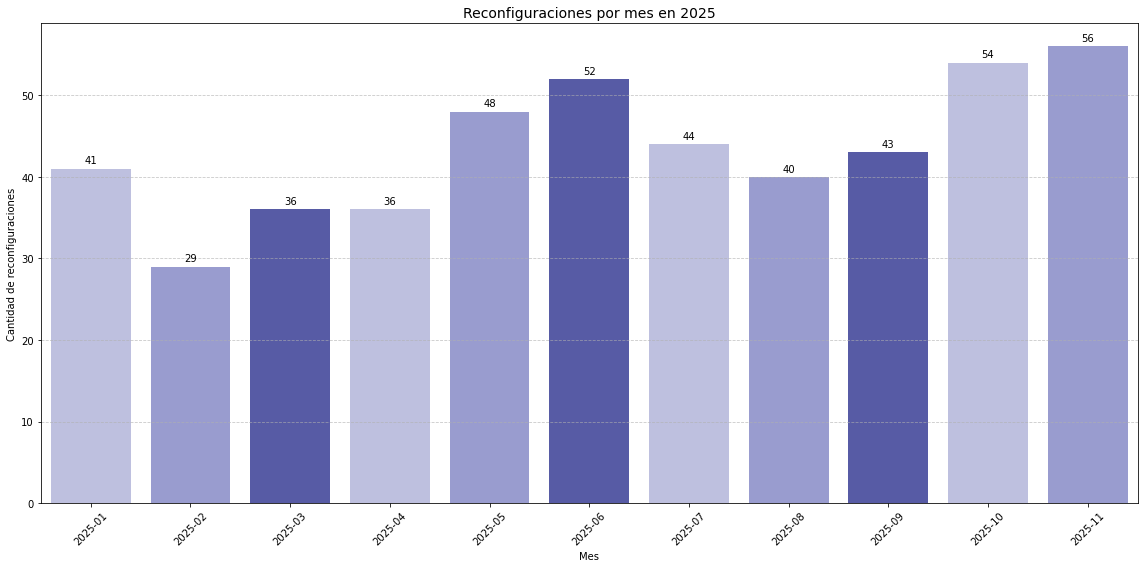

In [ ]:
# Convertir la columna Fecha a datetime
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")

# Filtrar desde enero 2025 en adelante
df_reporte_2025 = df_reporte[df_reporte["Fecha"] >= "2025-01-01"].copy()

# Agrupar por mes y contar
df_reporte_2025['Mes'] = df_reporte_2025['Fecha'].dt.to_period("M").astype(str)

# Excluir mayo 2025
df_reporte_2025 = df_reporte_2025[df_reporte_2025['Mes'] != '2026-01']

# Conteo mensual
reconfiguraciones_por_mes = df_reporte_2025['Mes'].value_counts().sort_index()
df_plot = reconfiguraciones_por_mes.reset_index()
df_plot.columns = ['Mes', 'Cantidad']

# Paleta con más diferenciación
colores_meses_2025 = ["#B8BBE5", "#9094D8", "#4A4FB2"]

# Graficar
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=colores_meses_2025)

# Etiquetas sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title("Reconfiguraciones por mes en 2025", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Cantidad de reconfiguraciones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()

# ✅ Guardar
fig = ax.get_figure()
guardar_grafico(fig, 3)

plt.show()

### 4-. **Reconfiguraciones por mes y por instrumento (2025)**

#### 🎯 **Descripción del análisis**  
El gráfico de barras apiladas ilustra la **evolución mensual de las reconfiguraciones de proyectos INNOVA durante 2025**, clasificadas según el instrumento de financiamiento.  
Los datos provienen del archivo `df_reporte.csv`, considerando el período **enero–noviembre 2025**, y fueron procesados agrupando los instrumentos con participación **menor al 3 % del total** bajo la categoría **“Otros”**, con el objetivo de facilitar la lectura y comparabilidad.  
Cada barra desglosa el total mensual por instrumento, utilizando la paleta institucional CORFO.

#### 🥇 **Instrumentos que lideran en 2025**  

- **Crea y Valida** mantiene un **liderazgo operativo sostenido**, concentrando entre **60 % y 70 %** del total mensual de reconfiguraciones.  
  📌 En 2025 destacan los siguientes peaks:  
  - **Mayo (37 reconfiguraciones)**  
  - **Junio (32 reconfiguraciones)**  
  - **Octubre (33 reconfiguraciones)**  
  Estos periodos coinciden con los hitos administrativos de cierre semestral y revisión técnica institucional.

#### 🧩 **Instrumentos con presencia significativa**  

- **Consolida y Expande**:  
  - Presenta un crecimiento visible hacia mitad de año, alcanzando **11 solicitudes en junio** y **16 en octubre**.  
  - Su participación aumenta durante los procesos de ajuste de expansión y escalamiento empresarial.

- **Capital Humano**:  
  - Mantiene una actividad estable entre **4 y 9 reconfiguraciones mensuales**.  
  - Su peak se registra en **junio (9)**, asociado a cierres de seguimiento técnico en proyectos de formación.

- **Innova Alta Tecnología**:  
  - Muestra un comportamiento **intermitente**, con repuntes en **mayo (5)**, **junio (6)** y **octubre (9)**.  
  - Su tendencia refleja ciclos de validación técnica propios de proyectos de innovación avanzada.

- **Gestión de la Innovación / Otros**:  
  - Tienen una participación **marginal**, fluctuando entre **1 y 4 reconfiguraciones mensuales**.  
  - Representan programas de menor demanda operativa o casos puntuales.


📌 *Los meses comprendidos entre **mayo y julio** exhiben la mayor diversidad programática, con incrementos simultáneos en varios instrumentos, lo que coincide con las fases de mayor actividad administrativa tras los procesos de control semestral.*

> **Observación clave:**  
> 💡 Durante 2025 se aprecia una **mayor diversidad en la gestión de modificaciones**, pero **Crea y Valida** continúa siendo el eje estructural del sistema, concentrando la mayor carga operativa.  
> Este comportamiento confirma la necesidad de **planificación diferenciada por instrumento**, especialmente durante los meses de **mayo, junio y octubre**, donde convergen los mayores volúmenes de reconfiguraciones.

C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_35604\713878637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte_2025["Mes"] = df_reporte_2025["Fecha"].dt.to_period("M").astype(str)


✅ Guardado automático: maquetas/img\grafico_4.png


<Figure size 1152x576 with 0 Axes>

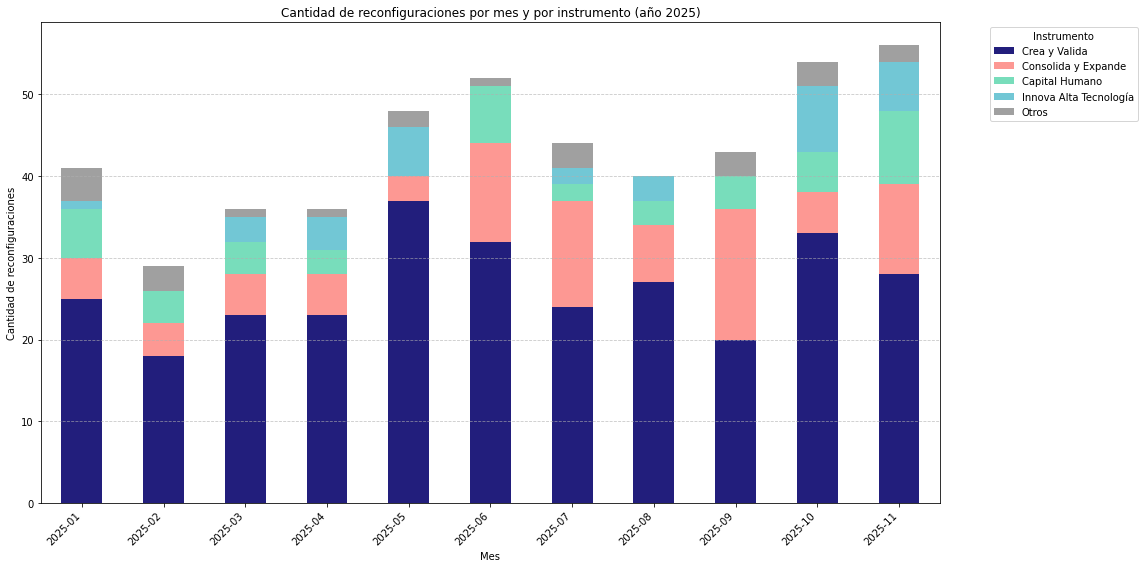

In [ ]:
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
df_reporte_2025 = df_reporte[df_reporte["Fecha"] >= "2025-01-01"]
df_reporte_2025["Mes"] = df_reporte_2025["Fecha"].dt.to_period("M").astype(str)

# Excluir abril 2025
df_reporte_2025 = df_reporte_2025[df_reporte_2025['Mes'] != '2026-01']

# Agrupamiento de instrumentos
porcentaje_instrumento = df_reporte_2025["Instrumento"].value_counts(normalize=True)
instrumentos_principales = porcentaje_instrumento[porcentaje_instrumento >= 0.03].index.tolist()

df_reporte_2025["Instrumento Agrupado"] = df_reporte_2025["Instrumento"].apply(
    lambda x: x if x in instrumentos_principales else "Otros"
)

# Tabla cruzada
tabla_instrumentos = pd.crosstab(df_reporte_2025["Mes"], df_reporte_2025["Instrumento Agrupado"])

# --- 🎨 Paleta de colores CORFO ajustada
color_mapeo = {
    "Crea y Valida": "#221E7C",
    "Consolida y Expande": "#FD9893",
    "Capital Humano": "#78DDBB",
    "Gestión de la Innovación": "#3F3F3F",
    "Innova Alta Tecnología": "#72C7D5",
    "Otros": "#A0A0A0"# Más contrastante que el celeste  # si aparece este también
}

# Ordenar columnas por frecuencia
orden_columnas = tabla_instrumentos.sum().sort_values(ascending=False).index.tolist()
tabla_instrumentos = tabla_instrumentos[orden_columnas]

# Colores ordenados
colores_usados = [color_mapeo.get(col, "#CCCCCC") for col in tabla_instrumentos.columns]

# --- 📊 Gráfico
plt.figure(figsize=(16, 8), facecolor='white')
tabla_instrumentos.plot(
    kind="bar",
    stacked=True,
    color=colores_usados,
    figsize=(16, 8)
)

plt.title("Cantidad de reconfiguraciones por mes y por instrumento (año 2025)", color='black')
plt.xlabel("Mes", color='black')
plt.ylabel("Cantidad de reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title="Instrumento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()

# ✅ Guardar automáticamente
fig = plt.gcf()
guardar_grafico(fig, 4)

plt.show()

### 5-. **Distribución de instrumentos en 2025**

#### 🎯 **Descripción del análisis**  
El gráfico circular presenta la **distribución porcentual de las solicitudes de reconfiguración de proyectos INNOVA**, clasificadas por instrumento de financiamiento durante el año 2025.  
Los porcentajes se calcularon sobre el total anual de notificaciones, agrupando en **“Otros”** aquellos instrumentos con participación **inferior al 2 %**, con el fin de mantener una visualización clara y centrada en los principales programas operativos.

#### 🥇 **Instrumento con mayor participación**  
- **Crea y Valida** concentra el **60.5 %** de las reconfiguraciones del año 2025, reafirmando su rol estructural en la gestión de modificaciones del portafolio INNOVA.  
  📌 Este predominio evidencia que más de la mitad de las solicitudes formales provienen de esta línea programática, reflejando su **alta demanda operativa** y su centralidad dentro del ecosistema institucional.

#### 🔍 **Conclusiones clave por instrumento**  

- **Consolida y Expande**: **18.0 %**  
  Se posiciona como el **segundo instrumento más activo**, con fuerte actividad en el segundo semestre del año.  

- **Capital Humano**: **9.8 %**  
  Mantiene una participación estable, asociada a ajustes en proyectos de formación, capacitación y fortalecimiento de capacidades.  

- **Innova Alta Tecnología**: **6.9 %**  
  Presenta una **participación sostenida y creciente**, con incidencia especialmente marcada en los meses de mayor actividad técnica.  

- **Gestión de la Innovación**: **2.3 %**  
  Su impacto es acotado, concentrado en modificaciones puntuales y casos específicos.  

- **Otros**: **2.5 %**  
  Agrupa instrumentos de baja recurrencia o con presencia marginal dentro del conjunto total de solicitudes.

> **Observación:**  
> 💡 La marcada concentración en *Crea y Valida* confirma la **dependencia operativa** de este instrumento en los procesos de reconfiguración, lo que implica un foco estratégico relevante para la planificación de recursos.  
> En paralelo, la participación creciente de *Consolida y Expande*, *Capital Humano* e *Innova Alta Tecnología* sugiere un **portafolio más diversificado y equilibrado**, alineado con las tendencias de fortalecimiento programático observadas en 2025.

#### 🧩 **Complementariedad con gráficos anteriores**  
Este gráfico refuerza los hallazgos del **Gráfico 4**, mostrando la distribución global que explica por qué *Crea y Valida* domina las reconfiguraciones mensuales, mientras que los demás instrumentos aportan un **crecimiento gradual y sostenido** en la variedad de modificaciones gestionadas durante el año.

✅ Guardado automático: maquetas/img\grafico_5.png


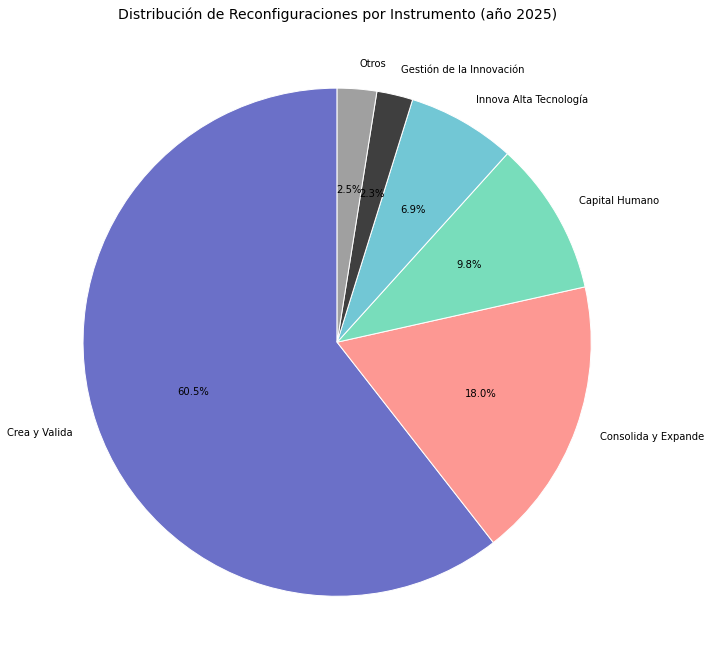

In [29]:
# Agrupar categorías con menos del 2% en "Otros"
conteo_instrumento = df_reporte_2025["Instrumento"].value_counts()
porcentajes = conteo_instrumento / conteo_instrumento.sum()

# Separar categorías principales y menores
principales = porcentajes[porcentajes >= 0.02]
otros = porcentajes[porcentajes < 0.02]

# Combinar
conteo_resumido = principales.copy()
conteo_resumido["Otros"] = otros.sum()

# 🎨 Paleta personalizada CORFO (ajustada)
color_mapeo_pie = {
        "Crea y Valida": "#6B70C8",  # 🔵 Más claro que #221E7C
        "Consolida y Expande": "#FD9893",
        "Capital Humano": "#78DDBB",
        "Gestión de la Innovación": "#3F3F3F",
        "Innova Alta Tecnología": "#72C7D5",
        "Otros": "#A0A0A0"
}

# Recalcular colores según las categorías actuales
colors = [color_mapeo_pie.get(cat, "#CCCCCC") for cat in conteo_resumido.index]

# Graficar pie chart actualizado
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax.set_facecolor("white")

ax.pie(
        conteo_resumido,
        labels=conteo_resumido.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white'}
)

plt.title("Distribución de Reconfiguraciones por Instrumento (año 2025)", fontsize=14)
plt.tight_layout()

# Guardar actualizado
guardar_grafico(fig, 5)

plt.show()

### 6-. **Reconfiguraciones por ejecutivo técnico (2025)**

#### 🎯 **Descripción del análisis**  
El gráfico de barras verticales muestra la cantidad total de **solicitudes de reconfiguración gestionadas por cada ejecutivo técnico** durante el año 2025 (enero–noviembre).  
Los nombres se presentan rotados para mejorar la legibilidad, y las barras utilizan un **degradado progresivo basado en el color institucional CORFO (#78DDBB)**.  
Se excluyeron del análisis aquellos casos asociados a ejecutivos en proceso de reasignación o con gestión indirecta de cartera, con el fin de asegurar la representatividad del indicador.

#### 🔍 **Concentración y distribución**  

- **Total de reconfiguraciones 2025 analizadas:** **313**  
- El **Top 3 de ejecutivos** —**Lisette Espinoza (49)**, **Juan Martínez F. (40)** y **Marta Mina Avendaño (39)**— concentran **128 reconfiguraciones**, equivalentes al **41 % del total anual**.  
  📌 Esto confirma una **alta concentración operativa** en un grupo reducido de ejecutivos con fuerte carga de gestión y seguimiento técnico.

#### 🏗️ **Resto del equipo**  

- Un segundo grupo compuesto por:
  - **Christopher Andrés Vivanco Barra (34)**  
  - **Juan Carlos Castro Cabezas (34)**  
  - **Cristófer Monsalve Sepúlveda (33)**  

  mantiene entre **33 y 34 reconfiguraciones**, evidenciando un **desempeño consistente y estable** en la gestión de modificaciones.

- Finalmente, los ejecutivos:
  - **Diego Villalobos Ramos (21)**  
  - **Hugo Jara Vargas (19)**  
  - **Javiera Gómez Murúa (18)**  
  - **María José Moraga Castro (18)**  
  - **Juan Pablo Álvarez Cereceda (2)**  

  presentan entre **18 y 2 reconfiguraciones**, reflejando una **distribución más acotada de carga operativa**, posiblemente asociada a menor tamaño de cartera o reasignaciones internas.

📊 En conjunto, los primeros **7 ejecutivos del ranking** concentran aproximadamente **82 % de todas las reconfiguraciones**, lo que evidencia una **estructura operativa altamente concentrada en el núcleo del equipo INNOVA**. Se debe hacer una mención adicional, que las gestiones realizadas por **María Belén Ramírez** y **José Vera Solís** se reportarán en el informe anual de reconfiguraciones.


> **Observación clave:**  
> 💡 Detectar los focos de concentración permite anticipar **sobrecargas administrativas**, optimizar la **distribución de cartera** y fortalecer la capacidad de respuesta técnica en periodos de alta demanda.  
> Se recomienda un monitoreo mensual del indicador para sostener la **equidad operativa** y asegurar una gestión eficiente del portafolio de proyectos.

C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_35604\3610489124.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


✅ Guardado automático: maquetas/img\grafico_6.png


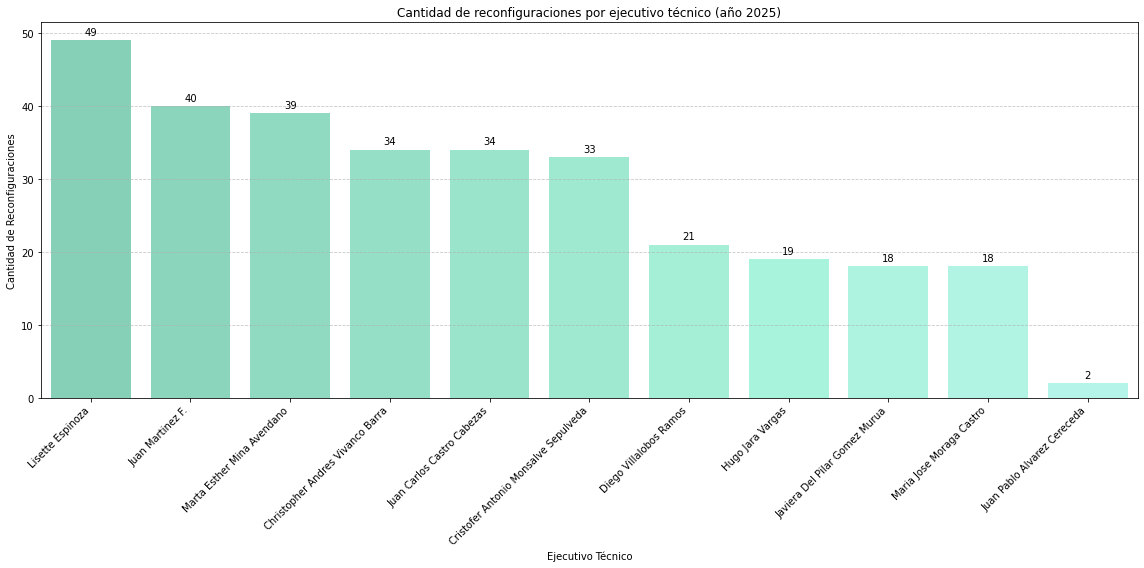

In [30]:
# --- Contar cantidad de reconfiguraciones por ejecutivo (para 2025)
conteo_ejecutivo = df_reporte_2025["Nombre_Ejecutivo_Técnico"].value_counts().reset_index()
conteo_ejecutivo.columns = ["Ejecutivo Técnico", "Cantidad"]

# --- Ejecutivos a excluir
excluir = [
    "Paula Camila Durán Aburto",
    "Pablo Gaete Haller",
    "Jeremy Antonio Salas Venegas",
    "Barbara Sol Parrague Guzman",
    "Jeanette Alejandra Mundaca Despecci",
    "No Tiene Ejecutivo Asignado",
    "Jose Javier Vera Solis",
    "Maria Belen Ramirez Bunster"
    
]

# --- Filtrar el DataFrame
conteo_ejecutivo = conteo_ejecutivo[~conteo_ejecutivo["Ejecutivo Técnico"].isin(excluir)]

# --- Generar degradado desde color base CORFO #78DDBB
base_color = mcolors.to_rgb("#78DDBB")
verde_corfo = [
    mcolors.to_hex(tuple(min(1, c + i * 0.02) for c in base_color))
    for i in range(len(conteo_ejecutivo))
]

# --- Graficar
fig = plt.figure(figsize=(16, 8), facecolor='white')
ax = sns.barplot(
    data=conteo_ejecutivo,
    x="Ejecutivo Técnico",
    y="Cantidad",
    palette=verde_corfo
)

# --- Etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# --- Estilo y diseño
plt.title("Cantidad de reconfiguraciones por ejecutivo técnico (año 2025)", color='black')
plt.xlabel("Ejecutivo Técnico", color='black')
plt.ylabel("Cantidad de Reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('white')
plt.tight_layout()

# ✅ Guardar automáticamente
guardar_grafico(fig, 6)

plt.show()

### 7-. **Reconfiguraciones por ejecutivo técnico e instrumento (2025)**

#### 🎯 **Descripción del análisis**  
El gráfico de barras apiladas presenta la **distribución de las reconfiguraciones por ejecutivo técnico y por instrumento de financiamiento** durante el año 2025.  
Los datos provienen del archivo `df_reporte.csv`, considerando únicamente a los ejecutivos con **gestión activa de cartera** y excluyendo casos en reasignación o con carga indirecta.  
Cada color corresponde a un instrumento según la **paleta institucional CORFO**, lo que permite visualizar no solo el **volumen total por ejecutivo**, sino también la **composición interna** de los instrumentos que cada uno gestiona.

#### 📊 **Estructura general del desempeño**  

- El mayor volumen de reconfiguraciones se concentra en **Lisette Espinoza (49)**, **Juan Martínez F. (40)** y **Marta  Mina Avendaño (39)**, con un claro dominio del instrumento **Crea y Valida** como principal motor de su carga operativa.

- Un segundo grupo, compuesto por  
  **Christopher Vivanco Barra (34)**,  
  **Juan Carlos Castro Cabezas (34)** y  
  **Cristofer Monsalve Sepúlveda (33)**,  
  exhibe una **distribución más equilibrada** entre instrumentos, gestionando una combinación relevante de **Consolida y Expande**, **Capital Humano** y, en algunos casos, **Innova Alta Tecnología**.

- En la zona inferior del ranking aparecen ejecutivos como  
  **Diego Villalobos Ramos (21)**,  
  **Hugo Jara Vargas (19)**,  
  **Javiera del Pilar Gómez Murúa (18)**,  
  **María José Moraga Castro (18)** y  
  **Juan Pablo Álvarez Cereceda (2)**,  
  quienes mantienen cargas operativas más acotadas, aunque con presencia transversal en dos o más instrumentos.

#### 🧩 **Composición por instrumento**  

- **Crea y Valida** es el instrumento dominante en la mayoría de los ejecutivos, superando el **60 %** de la carga en figuras como Lisette Espinoza, Juan Martínez F. y María Esther Miño Avendaño.

- **Consolida y Expande** logra una participación relevante especialmente en  
  **Cristófer Monsalve Sepúlveda** y **Juan Carlos Castro Cabezas**,  
  quienes presentan una **cartera más diversificada** y con mayor énfasis en proyectos de consolidación y escalamiento.

- **Capital Humano** representa entre el **15 % y 25 %** en ejecutivos como  
  **Diego Villalobos Ramos** y **Javiera Gómez Murúa**,  
  reflejando su rol estable pero secundario en la demanda de reconfiguraciones.

- **Innova Alta Tecnología** y **Otros** mantienen una incidencia más baja, pero funcionan como **líneas complementarias**, particularmente visibles en  
  **Lisette Espinoza**, **Juan Martínez F.** y **Christopher Vivanco Barra**.

#### 🔍 **Lectura operativa**  
📌 La distribución observada revela una **alta concentración operativa** en torno al instrumento *Crea y Valida* y en un conjunto reducido de ejecutivos que absorben la mayor parte de la carga anual.  
La paleta apilada evidencia, además, una **diversificación progresiva por instrumento**, particularmente en el grupo intermedio.

> **Observación clave:**  
> 💡 Este análisis permite identificar **especializaciones temáticas** y **focos de sobrecarga** por instrumento.  
> La recomendación es fortalecer la **gestión transversal entre instrumentos** y promover una **redistribución técnica equilibrada** para mitigar riesgos operativos en períodos de alta demanda.

✅ Guardado automático: maquetas/img\grafico_7.png


<Figure size 1152x576 with 0 Axes>

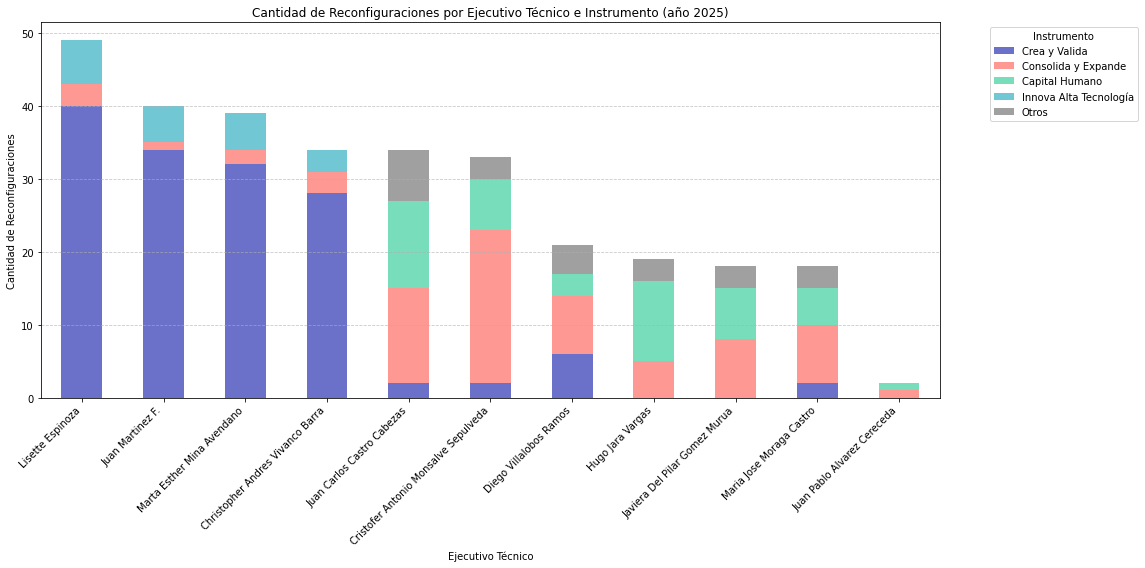

In [31]:
# --- Definir paleta institucional CORFO (instrumento → color)
colores_instrumentos = {
    "Crea y Valida": "#6B70C8",  # 🔵 Más claro que #221E7C
    "Consolida y Expande": "#FD9893",
    "Capital Humano": "#78DDBB",
    "Gestión de la Innovación": "#3F3F3F",
    "Innova Alta Tecnología": "#72C7D5",
    "Otros": "#A0A0A0"  # Gris claro para categoría residual
}

# --- Ejecutivos a excluir
excluir = [
    "Paula Camila Durán Aburto",
    "Pablo Gaete Haller",
    "Jeremy Antonio Salas Venegas",
    "Barbara Sol Parrague Guzman",
    "Jeanette Alejandra Mundaca Despecci",
    "No Tiene Ejecutivo Asignado",
    "Jose Javier Vera Solis",
    "Maria Belen Ramirez Bunster"
]

# --- Filtrar DataFrame antes de crear la tabla cruzada
df_filtrado = df_reporte_2025[~df_reporte_2025["Nombre_Ejecutivo_Técnico"].isin(excluir)]

# --- Crear tabla cruzada: ejecutivo técnico x instrumento
tabla_ejecutivo_instrumento = pd.crosstab(
    df_filtrado["Nombre_Ejecutivo_Técnico"],
    df_filtrado["Instrumento Agrupado"]
)

# --- Ordenar por total de reconfiguraciones
tabla_ejecutivo_instrumento = tabla_ejecutivo_instrumento.loc[
    tabla_ejecutivo_instrumento.sum(axis=1).sort_values(ascending=False).index
]

# --- Reordenar columnas según preferencia
column_order = [col for col in colores_instrumentos if col in tabla_ejecutivo_instrumento.columns]
tabla_ejecutivo_instrumento = tabla_ejecutivo_instrumento[column_order]

# --- Obtener lista de colores en el mismo orden de columnas
colores = [colores_instrumentos[col] for col in tabla_ejecutivo_instrumento.columns]

# --- Graficar gráfico de barras apiladas
fig = plt.figure(figsize=(16, 8), facecolor='white')
tabla_ejecutivo_instrumento.plot(
    kind="bar",
    stacked=True,
    color=colores,
    figsize=(16, 8)
)

plt.title("Cantidad de Reconfiguraciones por Ejecutivo Técnico e Instrumento (año 2025)", color='black')
plt.xlabel("Ejecutivo Técnico", color='black')
plt.ylabel("Cantidad de Reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title="Instrumento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('white')
plt.tight_layout()

# ✅ Guardar automáticamente
fig = plt.gcf()
guardar_grafico(fig, 7)

plt.show()

### 8-. **Reconfiguraciones por tipo de notificación (2025)**

#### 🎯 **Descripción del análisis**  
El gráfico circular presenta la **distribución porcentual de los tipos de notificación** registrados en las solicitudes de reconfiguración de proyectos INNOVA durante el año 2025 (enero–octubre).  
Para asegurar una visualización clara y representativa, solo se incluyen categorías con una participación **igual o superior al 4 %**, descartando agrupaciones marginales que podrían distorsionar la lectura.

#### 🥇 **Tipo de notificación más frecuente**  

Los resultados muestran la siguiente distribución:

- **Reitemización**: **42.6 %**  
- **Reprogramación**: **22.9 %**  
- **Rectifica**: **11.9 %**  
- **Reitemización y Reprogramación**: **11.2 %**  
- **Suspensión**: **7.2 %**  
- **Modificación de Proyecto**: **4.2 %**

📌 *La categoría **Reitemización** domina ampliamente la estructura anual, representando casi la mitad de todas las notificaciones procesadas en 2025. La segunda categoría más frecuente es **Reprogramación**, conformando junto a Reitemización el “core” operativo del sistema.*

#### 🔍 **Principales hallazgos**

- Las **Reitemizaciones (42.6 %)** concentran la mayor parte de los **ajustes presupuestarios**, especialmente en redistribuciones internas de gastos y correcciones de ítems.  

- Las **Reprogramaciones (22.9 %)** corresponden mayoritariamente a **solicitudes de extensión de plazos**, ajustes en hitos técnicos o retrasos en actividades críticas.

- Las notificaciones **combinadas** (*Reitemización y Reprogramación*, 11.2 %) reflejan **casuísticas de mayor complejidad**, donde se modifica tanto la estructura financiera como el cronograma del proyecto.

- **Rectifica (11.9 %)** mantiene una cuota estable dentro del portafolio de solicitudes, actuando como mecanismo para la **corrección técnica o documental**.

- Las categorías de **Suspensión (7.2 %)** y **Modificación de Proyecto (4.2 %)**, aunque menos frecuentes, implican **procesos administrativos exigentes** y por lo general requieren coordinación interáreas.

#### 📌 **Observación**

💡 La combinación *Reitemización + Reprogramación* acumula el **65 % del total anual**, confirmando que las principales causas de reconfiguración están directamente vinculadas a **ajustes presupuestarios y reajustes de plazos**.  
Este patrón evidencia la necesidad de reforzar:

- la **planificación financiera inicial**,  
- la **gestión temprana de desviaciones**, y  
- los mecanismos de **alerta preventiva** en la ejecución de proyectos.

#### 🧩 **Complementariedad con gráficos anteriores**

Este gráfico se articula con el análisis operativo presentado en:

- **Gráfico 6** (carga por ejecutivo técnico), y  
- **Gráfico 7** (composición por instrumento y ejecutivo),  

permitiendo comprender no solo *quién* gestiona más reconfiguraciones, sino **qué tipo de modificaciones predominan** en su carga operativa.  
Este enfoque facilita detectar focos críticos y orientar acciones de **mejora continua** en los procesos de revisión técnica.


✅ Guardado automático: maquetas/img\grafico_8.png


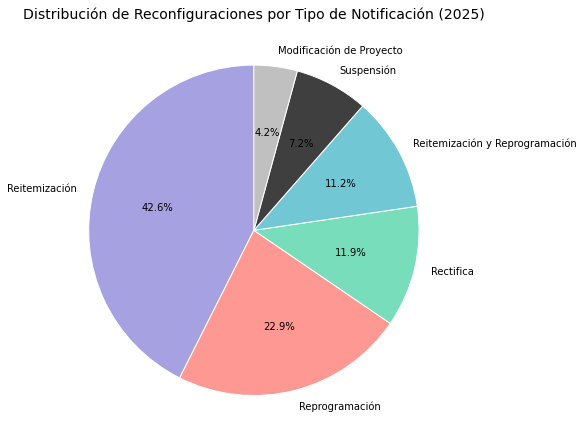

In [32]:
# Agrupar categorías con menos del 3% en "Otros"
conteo_tipo = df_reporte_2025["Tipo Notificación"].value_counts()
porcentajes = conteo_tipo / conteo_tipo.sum()

principales = porcentajes[porcentajes >= 0.04]
otros = porcentajes[porcentajes < 0.04]

conteo_resumido = principales.copy()
# conteo_resumido["Otros"] = otros.sum() # SE OPTA POR NO CONSIDERAR "Otros" EN ESTE REPORTE (JUNIO 2025)

# Detectar categoría con mayor porcentaje
categoria_max = conteo_resumido.idxmax()

# 🎨 Paleta institucional CORFO (sin repetir)
paleta_corfo = [
        "#A6A1E0",  # Morado claro institucional (para la mayor)
        "#FD9893",  # Rosado institucional
        "#78DDBB",  # Verde menta institucional
        "#72C7D5",  # Celeste institucional
        "#3F3F3F",  # Gris oscuro
        "#C0C0C0",  # Gris claro
        "#221E7C",  # Azul institucional fuerte
        "#BBBBFF"   # Lavanda de apoyo
]

# ✅ Asignar colores sin repetir
colores_dict = {}
usados = set()

for cat in conteo_resumido.index:
        if cat == categoria_max:
                colores_dict[cat] = "#A6A1E0"
                usados.add("#A6A1E0")
        else:
                for color in paleta_corfo:
                        if color not in usados:
                                colores_dict[cat] = color
                                usados.add(color)
                                break
                        else:
                                colores_dict[cat] = "#999999"  # fallback si se acaban los colores

# Lista ordenada de colores
colores = [colores_dict[cat] for cat in conteo_resumido.index]

# 📊 Gráfico pie
fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
ax.set_facecolor("white")

ax.pie(
        conteo_resumido,
        labels=conteo_resumido.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colores,
        textprops={'color': 'black'},
        wedgeprops={'edgecolor': 'white'}
)

plt.title("Distribución de Reconfiguraciones por Tipo de Notificación (2025)", color='black', fontsize=14)
plt.tight_layout()

# ✅ Guardar gráfico
guardar_grafico(fig, 8)

plt.show()

### 9-. **Estado de tramitación de Reconfiguraciones (2025)**

#### 🎯 **Descripción del análisis**  
El gráfico de barras presenta la **distribución de las solicitudes de reconfiguración** según su estado administrativo interno, basado en la columna **“Situación (uso interno MC)”**.  
El análisis considera el período **enero–octubre 2025** y refleja el avance real del flujo de tramitación en el sistema de Mejora Continua.

#### ✅ **Análisis de gestión**  
Los resultados obtenidos muestran la siguiente distribución:

- **FINALIZADA**: **299 solicitudes (≈ 66.4 %)** — representa la categoría dominante, evidenciando un **alto nivel de cierre de solicitudes en un período acotado** dentro del ciclo operativo.  
- **NO APLICA**: **118 solicitudes (≈ 26.2 %)** — agrupa casos **asociados con observaciones en las cartas**, donde la solicitud no genera acción técnica y requiere **mejoras importantes para evitar rechazos desde Seguimiento Financiero**.  
- **PENDIENTE REVISIÓN FINANCIERA**: **32 solicitudes (≈ 7.1 %)** — corresponden a solicitudes pendientes del área financiera, correspondientes a la última etapa de finalización de estas solicitudes.  
- **PROCESAR**: **15 solicitudes (≈ 3.3 %)** — se encuentran en etapa preliminar de análisis o revisión inicial.  
- **NO GESTIONABLE**: **15 solicitudes (≈ 3.3 %)** — casos que presentan solicitudes pendientesm que requieren atención para continuar trámite.  

📊 *El total procesado asciende a **479 solicitudes**, donde un **93.4 %** ya está cerrado o sin requerimiento operativo, mientras que un **6.6 %** corresponde a carga activa que aún requiere intervención del equipo técnico o financiero.*

#### 🔍 **Observaciones clave**  

- El alto volumen en **FINALIZADA** confirma un flujo interno **maduro y eficiente**, con buena trazabilidad de cierre.  
- La categoría **NO APLICA**, con 118 casos, señala un **punto crítico para la mejora del proceso de creación de estas solicitudes**, evitando retrabajo administrativo futuro.  
- Las categorías **PROCESAR**, **NO GESTIONABLE** y **PENDIENTE REVISIÓN FINANCIERA** representan el **núcleo operativo activo** que debe ser monitoreado semanalmente para evitar acumulación de backlog.

> **Observación clave:**   
> Esta visibilidad permite priorizar esfuerzos y optimizar la **gestión del flujo operativo** en períodos de alta demanda.


✅ Guardado automático: maquetas/img\grafico_9.png


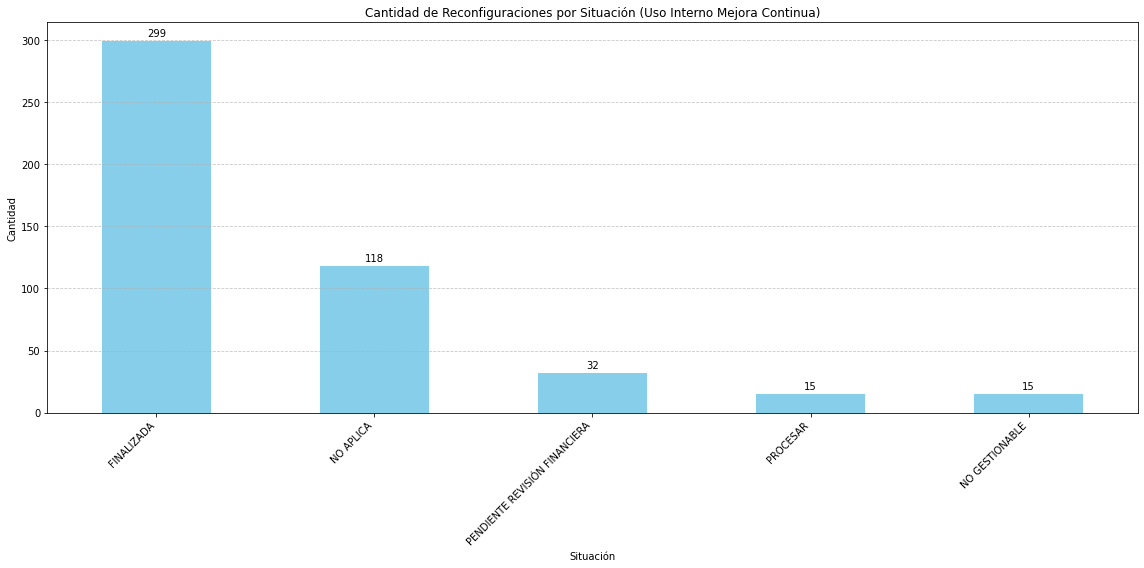

In [33]:
# Definir las categorías que queremos contar
situaciones_objetivo = [
    "PROCESAR", "NO GESTIONABLE", "NO APLICA", "PROCESADA", "PENDIENTE REVISIÓN FINANCIERA", "FINALIZADA"
]

# Filtrar y contar solo esas categorías
conteo_situaciones = df_reporte_2025["Situación (uso interno MC)"].value_counts()
conteo_filtrado = conteo_situaciones[conteo_situaciones.index.isin(situaciones_objetivo)]

# Graficar el conteo filtrado en un gráfico de barras
fig, ax = plt.subplots(figsize=(16, 8), facecolor='white')
bars = conteo_filtrado.plot(kind='bar', color='skyblue', ax=ax)

plt.title("Cantidad de Reconfiguraciones por Situación (Uso Interno Mejora Continua)", color='black')
plt.xlabel("Situación", color='black')
plt.ylabel("Cantidad", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor("white")
plt.tight_layout()

# ➕ Agregar etiquetas de valor sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3, color='black')

# ✅ Guardar el gráfico como grafico_8.png
guardar_grafico(fig, 9)

plt.show()

### 10-. **Distribución de reconfiguraciones por mes y estado (2025)**

#### 🎯 **Descripción del análisis**  
El gráfico presenta la **evolución mensual de las solicitudes de reconfiguración** según su estado administrativo interno, correspondiente a la columna _“Situación (uso interno MC)”_, durante el período **enero–noviembre 2025**.  
Los estados incluidos corresponden a las categorías más representativas del flujo operativo:  
**FINALIZADA**, **NO APLICA**, **PROCESAR**, **NO GESTIONABLE**, **PENDIENTE REVISIÓN FINANCIERA** y **PROCESADA**.  

La visualización permite identificar cambios en la **capacidad de cierre**, la **carga operativa activa** y los patrones mensuales de clasificación administrativa.

#### 📊 **Evolución mensual del proceso**  

- **Enero–Marzo 2025:**  
  - Se observa un ritmo consistente de cierres: **33 → 25 → 22 FINALIZADAS**.  
  - Los casos **NO APLICA** comienzan con baja incidencia (**8 en enero**, **4 en febrero**), incrementándose en marzo (**14 casos**).  
  - No se registran casos activos (PROCESAR, PRF, PROCESADA) en este período.

- **Abril–Junio 2025:**  
  - Se mantiene estabilidad en cierres con **23, 33 y 32 FINALIZADAS**.  
  - **NO APLICA** crece progresivamente, alcanzando **19 casos en junio**, su punto más alto.  
  - Empiezan a aparecer casos **PENDIENTE REVISIÓN FINANCIERA (1)** y **PROCESADA (1)**, indicando mayor complejidad documental.

- **Julio–Agosto 2025:**  
  - **Julio alcanza el peak anual con 37 FINALIZADAS**, reforzando el cierre semestral.  
  - Agosto desciende a **30 FINALIZADAS**, pero suben los casos de **NO APLICA (9)**.  
  - Los estados activos comienzan a acumularse: PRF (**1 en julio, 0 en agosto**), PROCESADA (**1 en julio**).

- **Septiembre–Noviembre 2025:**  
  - Se evidencia un cambio significativo: los cierres disminuyen (**23 → 30 → 11 FINALIZADAS**).  
  - Los casos activos aumentan, especialmente en **octubre y noviembre**:  
    - **PROCESAR:** 3 → 12  
    - **NO GESTIONABLE:** 3 → 7  
    - **PROCESADA:** 3 → 6  
    - **PENDIENTE REVISIÓN FINANCIERA:** 3 → 24  
    - **NO APLICA** también alcanza cifras relevantes: **16 en septiembre**, **11 en octubre**, **11 en noviembre**.  

📈 *El trimestre final muestra una transición desde un flujo de cierre eficiente hacia un escenario de **mayor backlog operativo**, con incremento sostenido en estados activos o pendientes.*
#### 🔍 **Hallazgos clave**

- **FINALIZADA** domina la distribución mensual, evidenciando un proceso históricamente eficiente.  
- **NO APLICA** crece de forma sostenida desde marzo, sugiriendo problemas de validación inicial y mayor volumen de solicitudes incorrectas, duplicadas o mal formuladas.  
- Los estados de **gestión activa** —PROCESAR, PROCESADA, NO GESTIONABLE y PRF— muestran un aumento significativo en **octubre y noviembre**, reflejando:  
  - incremento de carga administrativa,  
  - mayores tiempos de revisión técnica y financiera,  
  - potencial saturación del flujo operativo.  
- En conjunto, los meses finales concentran la mayoría de los casos **sin cierre**, alertando sobre un potencial **desbalance entre volumen de solicitudes y capacidad operativa** del equipo.


> **Observación clave:**  
> 💡 La disminución progresiva de casos **finalizados**, junto con el alza simultánea en estados **pendientes o activos**, indica un **punto de inflexión operativo** en el segundo semestre.  

#### 🧩 **Conclusión y relación con gráficos anteriores**  
El análisis temporal del estado de tramitación complementa las vistas presentadas en los gráficos 6–9, ofreciendo una **perspectiva dinámica del desempeño administrativo**.  
Permite identificar **meses críticos**, anticipar **cuellos de botella**, y orientar decisiones de **planificación de recursos**, asegurando continuidad y eficiencia del proceso de reconfiguraciones INNOVA.


📋 Columnas disponibles: ['FINALIZADA', 'NO APLICA', 'NO GESTIONABLE', 'PENDIENTE REVISIÓN FINANCIERA', 'PROCESAR']
✅ Guardado automático: maquetas/img\grafico_10.png


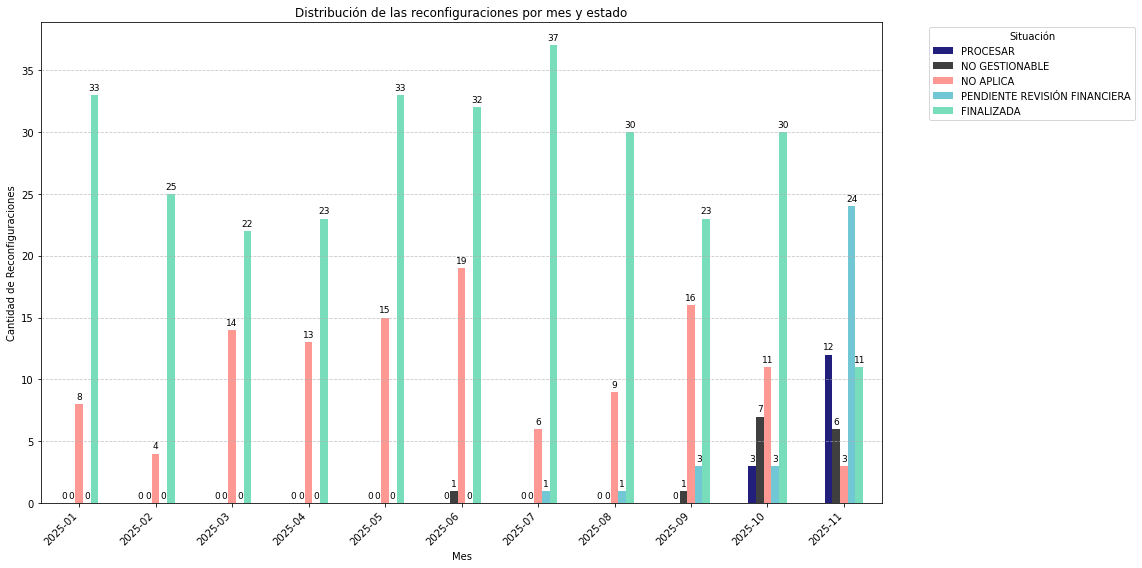

In [34]:
# Crear tabla cruzada: filas=mes, columnas=situación, valores=cantidad
tabla_situaciones = pd.crosstab(
    df_reporte_2025["Mes"],
    df_reporte_2025["Situación (uso interno MC)"]
)

# Revisar nombres reales en las columnas para evitar errores de clave
columnas_disponibles = tabla_situaciones.columns.tolist()
print("📋 Columnas disponibles:", columnas_disponibles)

# Situaciones de interés (según lo esperado)
situaciones_objetivo = ['PROCESAR', 'NO GESTIONABLE', 'NO APLICA', 'PROCESADA', 'PENDIENTE REVISIÓN FINANCIERA','FINALIZADA']

# Filtrar solo las que realmente están presentes en el DataFrame
situaciones_validas = [s for s in situaciones_objetivo if s in columnas_disponibles]
tabla_situaciones = tabla_situaciones[situaciones_validas]

# Diccionario de colores institucionales CORFO para cada situación
colores_estado = {
    "FINALIZADA": "#78DDBB",                    # Verde institucional
    "NO APLICA": "#FD9893",                     # Rosado institucional
    "NO GESTIONABLE": "#3F3F3F",                # Gris oscuro
    "PENDIENTE REVISIÓN FINANCIERA": "#72C7D5",   # Celeste
    "PROCESAR": "#221E7C",                      # Azul oscuro institucional
    "PROCESADA": "#A0A0A0"                      # Gris claro
}

# Crear gráfico de barras agrupadas con colores personalizados
fig, ax = plt.subplots(figsize=(16, 8), facecolor='white')
tabla_situaciones.plot(
    kind="bar",
    stacked=False,
    color=[colores_estado[col] for col in situaciones_validas],
    ax=ax
)

plt.title("Distribución de las reconfiguraciones por mes y estado", color='black')
plt.xlabel("Mes", color='black')
plt.ylabel("Cantidad de Reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title="Situación", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# ➕ Etiquetas sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3, color='black')

# ✅ Guardar el gráfico
guardar_grafico(fig, 10)
plt.show()
plt.show()

### 📋 **Tabla resumen 1: cartas correctas vs. cartas con observaciones**

#### 🎯 **Descripción del análisis**  
La siguiente tabla presenta la **distribución total de cartas de reconfiguración emitidas**, clasificadas según si presentan o no observaciones asociadas durante su tramitación.  
La categorización se construyó a partir de la columna **“Casuísticas errores en solicitudes”**, donde los registros **vacíos o nulos** se asignan como **“Sin observaciones”**, mientras que aquellos con texto o descripciones de errores se clasifican como **“Con observaciones”**.

#### 🔍 **Resultados principales**  
- **735** cartas fueron emitidas **sin observaciones**, lo que corresponde al **87.0 %** del total.  
- **110** cartas presentaron **observaciones o errores formales**, equivalente al **13.0 %**.  
- Esto refleja que **casi nueve de cada diez cartas** se emiten correctamente en su primera versión, mostrando un proceso altamente controlado y consistente.

#### ✅ **Implicancias para la Mejora Continua**  
- Consolidar los **controles de validación previos a la emisión**, dado su impacto positivo en la reducción de errores.  
- Implementar mecanismos automáticos de **detección temprana de inconsistencias**, especialmente en campos críticos del documento.  
- Incorporar trazabilidad por **ejecutivo técnico, instrumento y tipo de solicitud**, para detectar patrones recurrentes y gestionarlos oportunamente.  
- Integrar este indicador a la **bitácora mensual de control de calidad**, permitiendo seguimiento sistemático y comparación histórica.

📌 *La proporción observada —con solo un 13 % de cartas con observaciones— confirma un proceso documental maduro, con altos niveles de precisión y coherencia técnica.*



In [35]:
# Clasificar los registros como "Con errores" o "Sin errores (NaN)"
df_reporte["Clasificación Errores"] = df_reporte["Casuisticas errores en solicitudes"].apply(
    lambda x: "Con observaciones" if pd.notna(x) else "Sin observaciones"
)

# Generar la tabla resumen
tabla_errores_total = df_reporte["Clasificación Errores"].value_counts().reset_index()
tabla_errores_total.columns = ["Clasificación", "Cantidad"]

# Agregar columna de porcentaje
total = tabla_errores_total["Cantidad"].sum()
tabla_errores_total["Porcentaje"] = (tabla_errores_total["Cantidad"] / total * 100).round(1).astype(str) + "%"

# Mostrar tabla con título sin índice
display(Markdown("### Tabla 1: **Tabla de relación de cantidad de cartas emitidas correctas v/s cartas con observaciones**"))
display(tabla_errores_total.style.hide(axis="index"))

### Tabla 1: **Tabla de relación de cantidad de cartas emitidas correctas v/s cartas con observaciones**

Clasificación,Cantidad,Porcentaje
Sin observaciones,735,87.0%
Con observaciones,110,13.0%


### 📋 **Tabla resumen 2: cartas emitidas con vs. sin observaciones (2025)**

#### 🎯 **Objetivo del análisis**  
Esta tabla presenta la **evaluación de las cartas de reconfiguración emitidas exclusivamente durante el año 2025**, clasificadas según la presencia o ausencia de observaciones durante su tramitación.  
La categorización se obtuvo a partir del campo **“Casuísticas errores en solicitudes”**, considerando como **“Sin observaciones”** aquellos registros vacíos o nulos, y como **“Con observaciones”** aquellos que contienen comentarios, incidencias o errores detectados durante la revisión técnica o documental.

#### ⚠️ **Indicadores de calidad y oportunidades de mejora**  
- **Total de cartas analizadas (2025): 479**  
- **Sin observaciones:** 414 (**86.4 %**)  
- **Con observaciones:** 65 (**13.6 %**)  

📈 *El 86.4 % de cartas emitidas correctamente refleja un sistema documental estable y con altos niveles de control, mientras que el 13.6 % restante señala áreas donde los mecanismos preventivos pueden reforzarse.*

#### 🔍 **Observaciones clave**  
- El porcentaje de **cartas con observaciones (13.6 %)** se mantiene dentro de rangos razonables, aunque evidencia un **ligero incremento respecto del año anterior**, sugiriendo posibles variaciones en volumen operativo o en los criterios aplicados por los equipos técnicos.  
- Los **65 casos con observaciones** requieren análisis segmentado por **tipo de carta, ejecutivo técnico y origen del error** (plantilla, anexo, datos o formato).  
- Se recomienda consolidar un **seguimiento mensual de calidad documental**, integrando este indicador en el panel de control operativo.

#### ✅ **Conclusión operativa**  
El nivel de **efectividad documental del 2025 (86.4 % sin errores)** confirma la robustez del proceso de emisión y revisión, reflejando la madurez de la gestión interna.  
No obstante, la proporción de observaciones justifica fortalecer los **mecanismos de verificación automatizada, validación cruzada y retroalimentación continua**, asegurando que los estándares de calidad se mantengan e incrementen para los próximos ciclos.



In [36]:
# Clasificar los registros como "Con errores" o "Sin errores (NaN)"
df_reporte_2025["Clasificación Errores"] = df_reporte_2025["Casuisticas errores en solicitudes"].apply(
    lambda x: "Con observaciones" if pd.notna(x) else "Sin observaciones"
)

# Generar la tabla resumen
tabla_errores_2025 = df_reporte_2025["Clasificación Errores"].value_counts().reset_index()
tabla_errores_2025.columns = ["Clasificación", "Cantidad"]

# Agregar columna de porcentaje
total = tabla_errores_2025["Cantidad"].sum()
tabla_errores_2025["Porcentaje"] = (tabla_errores_2025["Cantidad"] / total * 100).round(1).astype(str) + "%"

# Mostrar tabla con título y sin índice
display(Markdown("### Tabla 2: **Tabla de relación de cantidad de cartas emitidas correctas v/s cartas con errores año 2025**"))
display(tabla_errores_2025.style.hide(axis="index"))

### Tabla 2: **Tabla de relación de cantidad de cartas emitidas correctas v/s cartas con errores año 2025**

Clasificación,Cantidad,Porcentaje
Sin observaciones,414,86.4%
Con observaciones,65,13.6%


## 📋 **Tabla resumen 3: clasificación de tipos de observaciones identificadas**

#### 🎯 **Objetivo del análisis**  
Esta tabla identifica y clasifica los **principales tipos de observaciones detectadas** durante la revisión de cartas de reconfiguración, según los registros contenidos en el campo **“Casuísticas errores en solicitudes”**.  
El propósito es visibilizar las **causas más frecuentes de error o inconsistencia documental**, permitiendo orientar acciones de **mejora continua**, estandarización de criterios y control de calidad interno.

#### ⚠️ **Observaciones más frecuentes detectadas**
- **Incidencias en el cálculo presupuestario**: 42 casos (**38.2 %**)  
- **Falta información adicional RRHH nuevos**: 33 casos (**30.0 %**)  
- **Error en la definición de fechas de los informes (TÉCNICOS, AVANCE Y FINAL)**: 14 casos (**12.7 %**)  
- **Falta claridad en monto a reitemizar**: 7 casos (**6.4 %**)  
- **Valores del presupuesto ya rendidos sin posibilidad de reitemizar**: 6 casos (**5.5 %**)  
- **Error en la definición de RRHH y otros gastos: pecuniarios y valorados**: 5 casos (**4.5 %**)  
- **Falta información adicional Presupuesto**: 3 casos (**2.7 %**)  

#### 🔍 **Análisis e interpretación**
- El **68.2 % de las observaciones** se concentra en dos causas críticas:  
  **(1)** incidencias en cálculos presupuestarios y **(2)** falta de información en RRHH nuevos.  
  Este patrón refuerza la dependencia entre **calidad de la información base**, consistencia técnica y correcta validación documental.  
- Los errores asociados a **fechas de informes (12.7 %)** impactan directamente en los tiempos de cierre, generando retrasos acumulativos en la cadena de tramitación.  
- Las categorías de menor frecuencia (≤ 7 %) siguen siendo relevantes, ya que su recurrencia sugiere **problemas estructurales no resueltos** en la captura de datos o revisión previa.

#### ✅ **Implicancias para la Mejora Continua**
- Implementar un **protocolo de validación cruzada** entre áreas técnicas y financieras para mitigar errores de cálculo y consistencia de montos.  
- Reforzar los **checklists de control previo** en formularios de ingreso y en la preparación de anexos y plantillas.  
- Instalar una instancia **trimestral de retroalimentación técnica**, enfocada especialmente en RRHH y definición presupuestaria.  
- Desarrollar una **bitácora digital de observaciones recurrentes**, con seguimiento de tendencias y alertas en categorías críticas.

📌 *El análisis evidencia que los principales focos de desviación están directamente vinculados a la calidad de la información presupuestaria y administrativa, consolidando la necesidad de fortalecer la integración y coordinación entre los equipos técnicos y financieros.*


In [37]:
# Filtrar solo los registros con errores (no NaN)
df_con_errores = df_reporte[df_reporte["Casuisticas errores en solicitudes"].notna()]

# Contar ocurrencias por tipología de error
tabla_errores_clasificacion_total = df_con_errores["Casuisticas errores en solicitudes"].value_counts().reset_index()
tabla_errores_clasificacion_total.columns = ["Casuística de observación", "Cantidad"]

# Agregar columna de porcentaje
total_errores = tabla_errores_clasificacion_total["Cantidad"].sum()
tabla_errores_clasificacion_total["Porcentaje"] = (tabla_errores_clasificacion_total["Cantidad"] / total_errores * 100).round(1).astype(str) + "%"

# Mostrar todo el contenido de las celdas
pd.set_option("display.max_colwidth", None)

# Mostrar con título y sin índice
display(Markdown("### Tabla 3: **Tabla de clasificación de tipos de observaciones identificadas**"))
display(tabla_errores_clasificacion_total.style.hide(axis="index"))

### Tabla 3: **Tabla de clasificación de tipos de observaciones identificadas**

Casuística de observación,Cantidad,Porcentaje
Incidencias en el cálculo presupuestario,42,38.2%
Falta información adicional RRHH nuevos,33,30.0%
"Error en la definición de las fechas de los informes (TÉCNICOS, AVANCE Y FINAL)",14,12.7%
Falta claridad en monto a reitemizar,7,6.4%
Valores del presupuesto ya rendidos sin posibilidad de reitemizar,6,5.5%
Error en la definición de RRHH y otros gastos: pecuniarios y valorados,5,4.5%
Falta información adicional Presupuesto,3,2.7%


In [38]:
html_folleto_estructura_inicial = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <title>Informe de Reconfiguraciones CORFO – Año 2024-2025</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background-color: #ffffff;
            color: #1a1a1a;
            margin: 40px;
            line-height: 1.6;
        }
        .header {
            background-color: #e9f2fb;
            padding: 30px;
            border-radius: 10px;
            margin-bottom: 40px;
        }
        .header h1 {
            color: #004a99;
            font-size: 28px;
            margin: 0;
        }
        .header h3 {
            color: #2f6fa5;
            font-size: 18px;
            margin: 0;
            font-weight: normal;
        }
        h2 {
            color: #004a99;
            margin-top: 40px;
        }
        .section {
            margin-bottom: 30px;
            text-align: justify;
        }
        .content {
            border-bottom: 1px solid #004a99;
            display: flex;
            flex-wrap: wrap;
            gap: 20px;
            margin-bottom: 50px;
        }
        .grafico, .explicacion, .tabla {
            flex: 1;
            max-width: 45%;
        }
        .grafico img {
            max-width: 100%;
            border-radius: 8px;
            border: 1px solid #ccc;
        }
        .explicacion {
            text-align: justify;
            font-size: 13px;
            color: #333333;
        }
        .tabla {
            overflow-x: auto;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            font-size: 14px;
            background-color: #fff;
            box-shadow: 0 2px 5px rgba(0,0,0,0.05);
        }
        th, td {
            border: 1px solid #ccc;
            padding: 8px 10px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
        ul {
            padding-left: 20px;
        }
        ul li {
            margin-bottom: 6px;
        }
        .footer {
            text-align: center;
            font-size: 13px;
            color: #666666;
            border-top: 1px solid #ddd;
            margin-top: 60px;
            padding-top: 20px;
        }

        /* ✨ Nueva clase destacada */
        .destacada {
            background-color: #f4f9ff;
            border-left: 5px solid #004a99;
            padding: 15px;
            margin-bottom: 30px;
        }
        /* Versión móvil: reorganiza bloques para pantallas pequeñas */
        @media (max-width: 1199px) {
            .content {
                flex-direction: column;
            }

            .explicacion, .grafico, .tabla {
                order: unset;        /* se respeta orden de inserción o el especificado arriba */
                max-width: 100% !important;  /* 🔧 sobrescribe el 45% */
                width: 100%;
            }

            .grafico img {
                max-width: 100%;
                height: auto;
            }
        }
    </style>
</head>
<body>
    <div class="header">
        <h1>Informe de Reconfiguraciones de Proyectos INNOVA</h1>
        <h3>Año 2025 – Mes de Noviembre. Análisis Ejecutivo</h3>
    </div>

    <!-- Este es el contenedor donde se insertará el contenido -->
    <section class="destacada"></section>
    <section class="contenido-tablas"></section>


</body>
    <div class="footer">
        Subdirección de Operaciones y Mejora Continua<br>
        Gerencia de Innovación<br>
        Corfo<br>
        2025 – Todos los derechos reservados
    </div>
</html>
"""

# # Guardar HTML base

output_path = "maquetas/html/Folleto_Final.html"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

with open(output_path, "w", encoding="utf-8") as f:
    f.write(html_folleto_estructura_inicial)

output_path

'maquetas/html/Folleto_Final.html'

In [39]:
# --- Parámetros
notebook_path = "reporte_reconfiguraciones.ipynb"
html_template_path = "maquetas/html/Folleto_Final.html"
output_path = "maquetas/html/Folleto_Final_ConGraficos.html"

# --- Cargar HTML base
with open(html_template_path, "r", encoding="utf-8") as f:
    soup = BeautifulSoup(f.read(), "html.parser")

# --- Cargar notebook
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# --- Insertar primer markdown explicativo antes de los gráficos
primer_md = None
for cell in nb.cells:
    if cell.cell_type == "markdown":
        primer_md = cell.source
        break

if primer_md:
    bloque_intro = soup.find("section", class_="destacada")
    if bloque_intro:
        bloque_intro.append(BeautifulSoup(markdown2.markdown(primer_md), "html.parser"))

# --- Namespace de tablas (¡asegúrate de definirlas antes!)
namespace = {
    "tabla_errores_total": tabla_errores_total,
    "tabla_errores_2025": tabla_errores_2025,
    "tabla_errores_clasificacion_total": tabla_errores_clasificacion_total,
}

# --- Crear secciones nuevas
seccion_graficos = soup.new_tag("section")
seccion_graficos.append(soup.new_tag("h2"))
seccion_graficos.h2.string = "📊 Análisis de Gráficos"

seccion_tablas = soup.new_tag("section")
seccion_tablas.append(soup.new_tag("h2"))
seccion_tablas.h2.string = "📋 Análisis de Tablas"

# --- Recorrer celdas del notebook
i = 0
img_index = 1

while i < len(nb.cells):
    md_cell = nb.cells[i]

    if i + 1 < len(nb.cells):
        code_cell = nb.cells[i + 1]
    else:
        break

    if md_cell.cell_type == "markdown" and code_cell.cell_type == "code":
        tiene_grafico = "plt.show" in code_cell.source
        tiene_tabla = "display(" in code_cell.source and ".style" in code_cell.source

        if tiene_grafico or tiene_tabla:
            explicacion_html = f"<div class='explicacion'>{markdown2.markdown(md_cell.source)}</div>"
            grafico_html = ""
            tabla_html = ""

            # 🔷 Gráfico
            if tiene_grafico:
                ruta_local = os.path.join("maquetas/img", f"grafico_{img_index}.png")
                if os.path.exists(ruta_local):
                    with open(ruta_local, "rb") as img_file:
                        encoded = base64.b64encode(img_file.read()).decode("utf-8")
                        grafico_html = f"""
                        <div class="grafico">
                            <img src="data:image/png;base64,{encoded}">
                        </div>
                        """

            # 🔶 Tabla
            match = re.search(r'display\((\w+)\.style', code_cell.source)
            if match:
                tabla_nombre = match.group(1)
                if tabla_nombre in namespace and hasattr(namespace[tabla_nombre], "to_html"):
                    tabla_html = f"<div class='tabla'>{namespace[tabla_nombre].to_html(index=False, escape=False)}</div>"

            # 🔽 Estructura del bloque
            bloque_html = soup.new_tag("section", **{"class": "content"})

            if tiene_grafico and grafico_html.strip():
                bloque_html.append(BeautifulSoup(grafico_html, "html.parser"))
                bloque_html.append(BeautifulSoup(explicacion_html, "html.parser"))
                seccion_graficos.append(bloque_html)

            if tiene_tabla and tabla_html.strip():
                bloque_html.append(BeautifulSoup(explicacion_html, "html.parser"))
                bloque_html.append(BeautifulSoup(tabla_html, "html.parser"))
                seccion_tablas.append(bloque_html)

            img_index += 1
            i += 2
        else:
            i += 1
    else:
        i += 1

# --- Insertar secciones en el body
soup.body.append(seccion_graficos)
soup.body.append(seccion_tablas)

# --- Guardar HTML final
os.makedirs(os.path.dirname(output_path), exist_ok=True)
with open(output_path, "w", encoding="utf-8") as f:
    f.write(str(soup))

print("✅ HTML final generado correctamente con secciones de gráficos y tablas.")

✅ HTML final generado correctamente con secciones de gráficos y tablas.


In [40]:
# # Mostrar el dataframe df_reporte_2025 filtrado por el mes de enero 2025 y ordenado por la fecha
# df_reporte_2025_filtrado_enero = df_reporte_2025[df_reporte_2025["Mes"] == "2025-01"]
# df_reporte_2025_filtrado_enero = df_reporte_2025_filtrado_enero.sort_values(by="Fecha")
# df_reporte_2025_filtrado_enero






---

In [41]:
# # 📅 Convertir la columna Fecha a tipo datetime
# df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")

# # 🧮 Clasificar los registros como "Con errores" o "Sin errores"
# df_reporte["Clasificación_Errores"] = df_reporte["Casuisticas errores en solicitudes"].apply(
#     lambda x: "Con errores" if pd.notna(x) else "Sin errores"
# )

# # 📆 Generar columna "Mes"
# df_reporte["Mes"] = df_reporte["Fecha"].dt.to_period("M").astype(str)

# # 📊 Generar tabla: errores por instrumento
# errores_por_instrumento = df_reporte[df_reporte["Clasificación_Errores"] == "Con errores"] \
#     .groupby("Instrumento")["Código"].count().reset_index(name="Con errores")

# # 📊 Total de solicitudes por instrumento
# total_por_instrumento = df_reporte.groupby("Instrumento")["Código"].count().reset_index(name="Total solicitudes")

# # 🔗 Unir ambas tablas y calcular porcentaje de errores
# errores_ratio = pd.merge(total_por_instrumento, errores_por_instrumento, on="Instrumento", how="left")
# errores_ratio["Con errores"] = errores_ratio["Con errores"].fillna(0).astype(int)
# errores_ratio["% Con errores"] = (errores_ratio["Con errores"] / errores_ratio["Total solicitudes"] * 100).round(1).astype(str) + "%"

# # 📝 Mostrar título y tabla sin índice
# from IPython.display import display, Markdown

# display(Markdown("### 🧾 Tabla: Relación de solicitudes con errores por instrumento"))
# display(errores_ratio.style.hide(axis="index"))

In [42]:
# # 📅 Convertir la columna Fecha a datetime y asegurar columna Año
# df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
# df_reporte["Año"] = df_reporte["Fecha"].dt.year

# # 🧮 Clasificar como "Con errores" o "Sin errores" si no existe ya
# if "Clasificación_Errores" not in df_reporte.columns:
#     df_reporte["Clasificación_Errores"] = df_reporte["Casuisticas errores en solicitudes"].apply(
#         lambda x: "Con errores" if pd.notna(x) else "Sin errores"
#     )

# # 🔹 Datos globales (total histórico)
# errores_total = df_reporte[df_reporte["Clasificación_Errores"] == "Con errores"] \
#     .groupby("Instrumento")["Código"].count().reset_index(name="Con errores total")

# total_total = df_reporte.groupby("Instrumento")["Código"].count().reset_index(name="Total solicitudes")

# # 🔹 Datos 2025
# df_2025 = df_reporte[df_reporte["Año"] == 2025]

# errores_2025 = df_2025[df_2025["Clasificación_Errores"] == "Con errores"] \
#     .groupby("Instrumento")["Código"].count().reset_index(name="Con errores 2025")

# total_2025 = df_2025.groupby("Instrumento")["Código"].count().reset_index(name="Total 2025")

# # 🔗 Unir todo
# tabla_comparativa = total_total.merge(errores_total, on="Instrumento", how="left") \
#     .merge(total_2025, on="Instrumento", how="left") \
#     .merge(errores_2025, on="Instrumento", how="left")

# # 🧼 Reemplazar nulos
# tabla_comparativa[["Con errores total", "Con errores 2025"]] = tabla_comparativa[
#     ["Con errores total", "Con errores 2025"]
# ].fillna(0).astype(int)

# # 📈 Cálculo de porcentajes (formato string con %)
# tabla_comparativa["% errores total"] = (
#     tabla_comparativa["Con errores total"] / tabla_comparativa["Total solicitudes"] * 100
# ).round(1).astype(str) + "%"

# tabla_comparativa["% errores 2025"] = (
#     (tabla_comparativa["Con errores 2025"] / tabla_comparativa["Total 2025"].replace(0, pd.NA)) * 100
# ).round(1).astype(str).fillna("0.0") + "%"

# # 📋 Mostrar tabla con título
# from IPython.display import display, Markdown

# display(Markdown("### 📊 Comparación de errores por instrumento: Total vs. 2025"))
# display(tabla_comparativa.style.hide(axis="index"))

In [43]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np


# # 🧽 Preprocesamiento
# df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
# df_reporte["Año"] = df_reporte["Fecha"].dt.year
# df_reporte["Clasificación_Errores"] = df_reporte["Casuisticas errores en solicitudes"].apply(
#     lambda x: "Con errores" if pd.notna(x) else "Sin errores"
# )

# # 🔹 Agrupaciones históricas
# errores_total = df_reporte[df_reporte["Clasificación_Errores"] == "Con errores"] \
#     .groupby("Instrumento")["Código"].count().reset_index(name="Con errores total")

# total_total = df_reporte.groupby("Instrumento")["Código"].count().reset_index(name="Total solicitudes")

# # 🔹 Agrupaciones 2025
# df_2025 = df_reporte[df_reporte["Año"] == 2025]
# errores_2025 = df_2025[df_2025["Clasificación_Errores"] == "Con errores"] \
#     .groupby("Instrumento")["Código"].count().reset_index(name="Con errores 2025")

# total_2025 = df_2025.groupby("Instrumento")["Código"].count().reset_index(name="Total 2025")

# # 🔗 Unir todas las tablas
# tabla = total_total.merge(errores_total, on="Instrumento", how="left") \
#                    .merge(total_2025, on="Instrumento", how="left") \
#                    .merge(errores_2025, on="Instrumento", how="left")

# # 🧼 Limpiar nulos
# tabla[["Con errores total", "Con errores 2025"]] = tabla[["Con errores total", "Con errores 2025"]].fillna(0).astype(int)

# # 📊 Crear dataframe para graficar
# grafico_df = tabla.copy()
# grafico_df["% errores total"] = grafico_df["Con errores total"] / grafico_df["Total solicitudes"] * 100
# grafico_df["% errores 2025"] = grafico_df["Con errores 2025"] / grafico_df["Total 2025"].replace(0, pd.NA) * 100

# # ─────────────────────────────────────────────
# # 🔻 GRÁFICOS: BARRAS + PIE TOTAL + PIE 2025
# # ─────────────────────────────────────────────

# fig, axs = plt.subplots(3, 1, figsize=(16, 22))

# # 1️⃣ GRÁFICO DE BARRAS COMPARATIVO
# x = np.arange(len(grafico_df["Instrumento"]))
# width = 0.35

# bars1 = axs[0].bar(x - width/2, grafico_df["% errores total"], width, label='% errores total', color="#FD9893")
# bars2 = axs[0].bar(x + width/2, grafico_df["% errores 2025"], width, label='% errores 2025', color="#72C7D5")

# axs[0].set_title("📊 Comparación de % de errores por instrumento: Total histórico vs. 2025", fontsize=14)
# axs[0].set_xlabel("Instrumento")
# axs[0].set_ylabel("% de errores")
# axs[0].set_xticks(x)
# axs[0].set_xticklabels(grafico_df["Instrumento"], rotation=45, ha='right')
# axs[0].legend()
# axs[0].grid(axis='y', linestyle='--', alpha=0.6)
# for bars in [bars1, bars2]:
#     axs[0].bar_label(bars, fmt='%.1f%%', padding=3)

# # 2️⃣ PIE CHART TOTAL HISTÓRICO
# errores_totales = tabla[tabla["Con errores total"] > 0][["Instrumento", "Con errores total"]]
# axs[1].pie(
#     errores_totales["Con errores total"],
#     labels=errores_totales["Instrumento"],
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=plt.cm.Paired.colors,
#     wedgeprops={'edgecolor': 'white'}
# )
# axs[1].set_title("🥧 Distribución de errores por instrumento (Total histórico)")

# # 3️⃣ PIE CHART 2025
# errores_2025_pie = tabla[tabla["Con errores 2025"] > 0][["Instrumento", "Con errores 2025"]]
# axs[2].pie(
#     errores_2025_pie["Con errores 2025"],
#     labels=errores_2025_pie["Instrumento"],
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=plt.cm.Pastel1.colors,
#     wedgeprops={'edgecolor': 'white'}
# )
# axs[2].set_title("🥧 Distribución de errores por instrumento (Año 2025)")

# plt.tight_layout()
# plt.show()

In [44]:
# # Ajustar el gráfico para que el eje de % errores vaya de 0 a 100%
# def graficar_tendencia_errores(df, titulo="Tendencia Temporal de Errores"):
#     df = df.copy()
#     df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
#     df = df[df["Fecha"] >= "2024-01-01"]
#     df = df[df["Fecha"].notna()]
#     df["Mes"] = df["Fecha"].dt.to_period("M").astype(str)
#     df["Clasificación_Errores"] = df["Casuisticas errores en solicitudes"].apply(
#         lambda x: "Con errores" if pd.notna(x) else "Sin errores"
#     )

#     # Agrupación
#     solicitudes_por_mes = df.groupby("Mes")["Código"].count().reset_index(name="Total solicitudes")
#     errores_por_mes = df[df["Clasificación_Errores"] == "Con errores"] \
#         .groupby("Mes")["Código"].count().reset_index(name="Con errores")

#     errores_tendencia = pd.merge(solicitudes_por_mes, errores_por_mes, on="Mes", how="left")
#     errores_tendencia["Con errores"] = errores_tendencia["Con errores"].fillna(0).astype(int)
#     errores_tendencia["% Errores"] = (errores_tendencia["Con errores"] / errores_tendencia["Total solicitudes"] * 100).round(1)

#     # Gráfico
#     fig, ax1 = plt.subplots(figsize=(14, 6))
#     ax1.bar(errores_tendencia["Mes"], errores_tendencia["Total solicitudes"], color="#D6E4F0", label="Total solicitudes")
#     ax1.set_ylabel("Total de solicitudes", color='black')
#     ax1.set_xlabel("Mes")
#     ax1.tick_params(axis='x', rotation=45)

#     # Línea de % errores
#     ax2 = ax1.twinx()
#     ax2.plot(errores_tendencia["Mes"], errores_tendencia["% Errores"], color="#FD9893", marker='o', label="% Errores")
#     ax2.set_ylabel("% de errores", color='black')
#     ax2.set_ylim(0, 100)  # Escala del 0% al 100%

#     for i, txt in enumerate(errores_tendencia["% Errores"]):
#         ax2.annotate(f"{txt}%", (errores_tendencia["Mes"][i], errores_tendencia["% Errores"][i] + 2), ha='center', fontsize=9)

#     plt.title(f"📈 {titulo}: % de errores vs total de solicitudes por mes")
#     fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.92))
#     plt.grid(axis='y', linestyle='--', alpha=0.5)
#     plt.tight_layout()
#     plt.show()

# # Ejecutar función actualizada
# graficar_tendencia_errores(df_reporte)

In [45]:
# # Asegurar que la columna de errores esté bien definida
# df_reporte["Clasificación_Errores"] = df_reporte["Casuisticas errores en solicitudes"].apply(
#     lambda x: "Con errores" if pd.notna(x) else "Sin errores"
# )

# # Calcular totales por instrumento
# total_por_instrumento = df_reporte.groupby("Instrumento")["Código"].count().reset_index(name="Total solicitudes")
# errores_por_instrumento = df_reporte[df_reporte["Clasificación_Errores"] == "Con errores"] \
#     .groupby("Instrumento")["Código"].count().reset_index(name="Con errores")

# # Unir ambos conteos y calcular % de errores
# tabla_errores = pd.merge(total_por_instrumento, errores_por_instrumento, on="Instrumento", how="left")
# tabla_errores["Con errores"] = tabla_errores["Con errores"].fillna(0).astype(int)
# tabla_errores["% Errores"] = (tabla_errores["Con errores"] / tabla_errores["Total solicitudes"] * 100).round(1)

# # Ordenar por cantidad de errores
# tabla_errores.sort_values(by="Con errores", ascending=False, inplace=True)

# # 🚨 Identificar si algún instrumento concentra más del 50% de todos los errores
# total_errores = tabla_errores["Con errores"].sum()
# tabla_errores["% del total de errores"] = (tabla_errores["Con errores"] / total_errores * 100).round(1)


# # ✅ Mostrar tabla complementaria
# from IPython.display import display, Markdown
# display(Markdown("### 📋 Tabla: Ranking de instrumentos según frecuencia y tasa de error"))
# display(tabla_errores.style.hide(axis="index"))

In [46]:
# # Filtrado de errores total
# errores_total = df_reporte[df_reporte["Clasificación_Errores"] == "Con errores"]
# conteo_total = errores_total["Instrumento"].value_counts().reset_index()
# conteo_total.columns = ["Instrumento", "Cantidad"]
# conteo_total["Porcentaje"] = (conteo_total["Cantidad"] / conteo_total["Cantidad"].sum() * 100).round(1)

# # Colores
# colores_instrumentos = {
#     "Crea y Valida": "#6B70C8",
#     "Consolida y Expande": "#FD9893",
#     "Capital Humano": "#78DDBB",
#     "Gestión de la Innovación": "#3F3F3F",
#     "Innova Alta Tecnología": "#72C7D5",
#     "Otros": "#A0A0A0"
# }
# colores = [colores_instrumentos.get(inst, "#CCCCCC") for inst in conteo_total["Instrumento"]]

# # Gráfico
# fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
# ax.set_facecolor("white")
# ax.pie(
#     conteo_total["Cantidad"],
#     labels=conteo_total["Instrumento"],
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=colores,
#     wedgeprops={'edgecolor': 'white'}
# )
# plt.title("📊 Distribución de errores por instrumento (Total histórico)", fontsize=14)
# plt.tight_layout()
# plt.show()

In [47]:
# # Filtrado año 2025
# df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
# df_2025 = df_reporte[df_reporte["Fecha"].dt.year == 2025]
# errores_2025 = df_2025[df_2025["Clasificación_Errores"] == "Con errores"]
# conteo_2025 = errores_2025["Instrumento"].value_counts().reset_index()
# conteo_2025.columns = ["Instrumento", "Cantidad"]
# conteo_2025["Porcentaje"] = (conteo_2025["Cantidad"] / conteo_2025["Cantidad"].sum() * 100).round(1)

# # Colores
# colores_2025 = [colores_instrumentos.get(inst, "#CCCCCC") for inst in conteo_2025["Instrumento"]]

# # Gráfico
# fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
# ax.set_facecolor("white")
# ax.pie(
#     conteo_2025["Cantidad"],
#     labels=conteo_2025["Instrumento"],
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=colores_2025,
#     wedgeprops={'edgecolor': 'white'}
# )
# plt.title("📊 Distribución de errores por instrumento (Año 2025)", fontsize=14)
# plt.tight_layout()
# plt.show()

---

In [48]:
# # 🛠 Consulta dinámica para obtener todos los campos de la tabla
# sql_query = """
# SELECT *
# FROM innova_sgp_Carga.dbo.snapshot_proyectos
# WHERE Gerencia = 'Innovación';
# """

# # 🔐 Cadena de conexión a SQL Server
# connection_string = (
#     "Driver={ODBC Driver 18 for SQL Server};"
#     "Uid=user_seg;Pwd=user_seg;"
#     "Server=ddssql11-avs\\orion;Port=1972;"
#     "Database=innova_sgp_Carga;Encrypt=No;TrustServerCertificate=No"
# )

# # 🔌 Conectar y ejecutar la consulta
# con = pyodbc.connect(connection_string, timeout=10)
# datos_proyecto = pd.read_sql_query(sql_query, con)

# # 🧹 Limpieza del DataFrame
# datos_proyecto = datos_proyecto.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# datos_proyecto = datos_proyecto.applymap(lambda x: None if x in ["", "NA"] else x)

# # 📝 Normalización de nombres de columnas
# datos_proyecto.columns = (
#     datos_proyecto.columns
#     .str.strip()
#     .str.replace(" ", "_")
#     .str.replace("ñ", "n")
# )

# # 🔒 Cierre de conexión
# con.close()

# # 👀 Mostrar nombres de columnas obtenidas
# print("✅ Columnas disponibles en snapshot_proyectos:")
# for col in datos_proyecto.columns:
#     print(f"• {col}")

In [49]:
# # Selección de columnas deseadas (asegúrate de que estén normalizadas sin tildes)
# columnas_deseadas = [
#     "codigo", 
#     "nombre_ejecutivo_tecnico", 
#     "instrumento", 
#     "estado_proyecto", 
#     "region_de_ejecucion"
# ]

# # Mostrar solo las columnas solicitadas
# print(datos_filtrados[columnas_deseadas]

In [50]:
# # 🛠 Consulta dinámica
# sql_query = """
# SELECT *
# FROM innova_sgp_Carga.dbo.snapshot_proyectos
# WHERE Gerencia = 'Innovación';
# """

# # 🔐 Cadena de conexión
# connection_string = (
#     "Driver={ODBC Driver 18 for SQL Server};"
#     "Uid=user_seg;Pwd=user_seg;"
#     "Server=ddssql11-avs\\orion;Port=1972;"
#     "Database=innova_sgp_Carga;Encrypt=No;TrustServerCertificate=No"
# )

# # 🔌 Ejecutar consulta
# con = pyodbc.connect(connection_string, timeout=10)
# datos_proyecto = pd.read_sql_query(sql_query, con)

# # 🧹 Limpieza del DataFrame
# datos_proyecto = datos_proyecto.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# datos_proyecto = datos_proyecto.applymap(lambda x: None if x in ["", "NA"] else x)

# # 📝 Normalización de columnas
# datos_proyecto.columns = (
#     datos_proyecto.columns
#     .str.strip()
#     .str.replace(" ", "_")
#     .str.replace("ñ", "n")
# )

# # 🔒 Cerrar conexión
# con.close()

# # ✅ Filtrar por nombres de ejecutivos
# nombres_ejecutivos = [
#     "JEREMY ANTONIO SALAS VENEGAS", 
#     "JEANETTE ALEJANDRA MUNDACA DESPECCI", 
#     "MARIA JOSE MORAGA CASTRO",
#     "MARTA ESTHER  MINA AVENDANO", 
#     "JUAN CARLOS CASTRO CABEZAS",
#     "BARBARA SOL PARRAGUE GUZMAN", 
#     "PAULA CAMILA DURÁN ABURTO",
#     "JAIME TORRES MUÑOZ", 
#     "HUGO JARA VARGAS",
#     "CRISTOFER ANTONIO MONSALVE SEPULVEDA", 
#     "DIEGO IGNACIO VILLALOBOS RAMOS VILLALOBOS RAMOS",
#     "JAVIERA DEL PILAR GOMEZ MURUA", 
#     "JUAN MARTINEZ F.", 
#     "PABLO GAETE HALLER",
#     "CHRISTOPHER ANDRES VIVANCO BARRA", 
#     "LISETTE ESPINOZA", 
#     "JUAN PABLO ALVAREZ CERECEDA",
#     "SEBASTIAN  JILBERTO", 
#     "YESSENNIA ESPINOZA", 
#     "ALEJANDRO  LEMUS",
#     "ANDRES SALVADOR LEAL VILCHES"
# ]

# # Convertir a mayúsculas la columna de ejecutivos técnicos (ajusta si tiene otro nombre exacto)
# columna_ejecutivo = "Nombre_Ejecutivo_Técnico"
# datos_filtrados = datos_proyecto[
#     datos_proyecto[columna_ejecutivo].str.upper().isin(nombres_ejecutivos)
# ]

# # 👀 Mostrar resultados
# display(Markdown("### 📋 Proyectos de ejecutivos seleccionados"))
# display(datos_filtrados.style.hide(axis="index"))

In [51]:
# # Paso 1: Filtrar por estado "ADJUDICADO"
# estado_adjudicado = datos_proyecto[datos_proyecto["Estado_Proyecto"] == "ADJUDICADO"]

# # Paso 2: Lista de nombres clave (en mayúsculas para facilitar búsqueda insensible a mayúsculas/minúsculas)
# nombres_ejecutivos = [
#     "JEREMY ANTONIO SALAS VENEGAS", 
#     "JEANETTE ALEJANDRA MUNDACA DESPECCI", 
#     "MARIA JOSE MORAGA CASTRO",
#     "MARTA ESTHER  MINA AVENDANO", 
#     "JUAN CARLOS CASTRO CABEZAS",
#     "BARBARA SOL PARRAGUE GUZMAN", 
#     "PAULA CAMILA DURÁN ABURTO",
#     "JAIME TORRES MUÑOZ", 
#     "HUGO JARA VARGAS",
#     "CRISTOFER ANTONIO MONSALVE SEPULVEDA", 
#     "DIEGO IGNACIO VILLALOBOS RAMOS VILLALOBOS RAMOS",
#     "JAVIERA DEL PILAR GOMEZ MURUA", 
#     "JUAN MARTINEZ F.", 
#     "PABLO GAETE HALLER",
#     "CHRISTOPHER ANDRES VIVANCO BARRA", 
#     "LISETTE ESPINOZA", 
#     "JUAN PABLO ALVAREZ CERECEDA",
#     "SEBASTIAN  JILBERTO", 
#     "YESSENNIA ESPINOZA", 
#     "ALEJANDRO  LEMUS",
#     "ANDRES SALVADOR LEAL VILCHES"
# ]

# # Paso 3: Convertir columna de ejecutivo técnico a mayúsculas para hacer comparación insensible a mayúsculas
# datos_filtrados = estado_adjudicado[
#     estado_adjudicado["Nombre_Ejecutivo_Tecnico"].str.upper().isin(nombres_ejecutivos)
# ]

# # Mostrar resultado
# from IPython.display import Markdown, display
# display(Markdown("### 📋 Proyectos 'ADJUDICADOS' con Ejecutivos Técnicos seleccionados"))
# display(datos_filtrados.style.hide(axis="index"))

In [52]:
# # Paso 1: Filtrar por estado "ADJUDICADO"
# estado_adjudicado = datos_proyecto[datos_proyecto["Estado_Proyecto"] == "ADJUDICADO"]

# # Paso 2: Lista de nombres clave (en mayúsculas para facilitar búsqueda insensible a mayúsculas/minúsculas)
# nombres_ejecutivos = [
#     "JEREMY ANTONIO SALAS VENEGAS", 
#     "JEANETTE ALEJANDRA MUNDACA DESPECCI", 
#     "MARIA JOSE MORAGA CASTRO",
#     "MARTA ESTHER  MINA AVENDANO", 
#     "JUAN CARLOS CASTRO CABEZAS",
#     "BARBARA SOL PARRAGUE GUZMAN", 
#     "PAULA CAMILA DURÁN ABURTO",
#     "JAIME TORRES MUÑOZ", 
#     "HUGO JARA VARGAS",
#     "CRISTOFER ANTONIO MONSALVE SEPULVEDA", 
#     "DIEGO IGNACIO VILLALOBOS RAMOS VILLALOBOS RAMOS",
#     "JAVIERA DEL PILAR GOMEZ MURUA", 
#     "JUAN MARTINEZ F.", 
#     "PABLO GAETE HALLER",
#     "CHRISTOPHER ANDRES VIVANCO BARRA", 
#     "LISETTE ESPINOZA", 
#     "JUAN PABLO ALVAREZ CERECEDA",
#     "SEBASTIAN  JILBERTO", 
#     "YESSENNIA ESPINOZA", 
#     "ALEJANDRO  LEMUS",
#     "ANDRES SALVADOR LEAL VILCHES"
# ]

# # Paso 3: Convertir columna de ejecutivo técnico a mayúsculas para hacer comparación insensible a mayúsculas
# datos_filtrados = estado_adjudicado[
#     estado_adjudicado["Nombre_Ejecutivo_Tecnico"].str.upper().isin(nombres_ejecutivos)
# ]

# # Mostrar resultado
# from IPython.display import Markdown, display
# display(Markdown("### 📋 Proyectos 'ADJUDICADOS' con Ejecutivos Técnicos seleccionados"))
# display(datos_filtrados.style.hide(axis="index"))

In [53]:
# # Paso 1: Estados válidos
# estados_validos = [
#     "VIGENTE",
#     "VIGENTE(Reprogramando)",
#     "VIGENTE(Reprogramación Rechazada)"
# ]

# # Paso 2: Lista de nombres clave (en mayúsculas para facilitar búsqueda insensible a mayúsculas/minúsculas)
# nombres_ejecutivos = [
#     "JEREMY ANTONIO SALAS VENEGAS", 
#     "JEANETTE ALEJANDRA MUNDACA DESPECCI", 
#     "MARIA JOSE MORAGA CASTRO",
#     "MARTA ESTHER  MINA AVENDANO", 
#     "JUAN CARLOS CASTRO CABEZAS",
#     "BARBARA SOL PARRAGUE GUZMAN", 
#     "PAULA CAMILA DURÁN ABURTO",
#     "JAIME TORRES MUÑOZ", 
#     "HUGO JARA VARGAS",
#     "CRISTOFER ANTONIO MONSALVE SEPULVEDA", 
#     "DIEGO IGNACIO VILLALOBOS RAMOS VILLALOBOS RAMOS",
#     "JAVIERA DEL PILAR GOMEZ MURUA", 
#     "JUAN MARTINEZ F.", 
#     "PABLO GAETE HALLER",
#     "CHRISTOPHER ANDRES VIVANCO BARRA", 
#     "LISETTE ESPINOZA", 
#     "JUAN PABLO ALVAREZ CERECEDA",
#     "SEBASTIAN  JILBERTO", 
#     "YESSENNIA ESPINOZA", 
#     "ALEJANDRO  LEMUS",
#     "ANDRES SALVADOR LEAL VILCHES"
# ]

# # Paso 3: Normalizar nombre del ejecutivo a mayúsculas para la comparación
# datos_proyecto["Nombre_Ejecutivo_Tecnico_Upper"] = datos_proyecto["Nombre_Ejecutivo_Técnico"].str.upper().str.strip()

# # Paso 4: Filtrar por estado y nombre de ejecutivo
# df_estado_proyecto = datos_proyecto[
#     datos_proyecto["Estado_Proyecto"].isin(estados_validos) &
#     datos_proyecto["Nombre_Ejecutivo_Tecnico_Upper"].isin(nombres_ejecutivos)
#     & datos_proyecto["Estado_Proyecto"] == "ADJUDICADO(Configurando)"
# ][["Código", "Nombre_Ejecutivo_Técnico", "Instrumento", "Estado_Proyecto", "Región_de_Ejecución"]]

# # Paso 5: Mostrar resultado
# print(f"✅ Se encontraron {len(df_estado_proyecto)} proyectos con estado vigente y ejecutivos filtrados:")
# display(df_estado_proyecto.head())

In [54]:
# # 🧮 Contar proyectos por ejecutivo técnico (ya filtrados previamente)
# conteo_por_ejecutivo = (
#     df_estado_proyecto
#     .groupby("Nombre_Ejecutivo_Técnico")
#     .size()
#     .reset_index(name="Total_Proyectos")
#     .sort_values(by="Total_Proyectos", ascending=False)
# )

# # 📊 Mostrar tabla
# print("📋 Conteo de proyectos vigentes por ejecutivo técnico:")
# display(conteo_por_ejecutivo)